In [1]:
import os
import glob
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
import pprint 
pp = pprint.PrettyPrinter(indent=4)
# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
util.set_sns_style(style='dark')
%matplotlib notebook

In [3]:
root_dir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
root_dir = os.path.join(root_dir, 'jyr')
#experiment = 'vertical_strip/paired_experiments' 
experiment = 'hdeltac/stripgrid' 
odor_width = 10

fig_id = os.path.join(root_dir.split('/My Drive')[1], experiment)
src_dir = os.path.join(root_dir, experiment)
save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}/rdp'.format(experiment)
save_dir = save_dir.replace(" ", "")

print("Saving figures to:{}    {}".format('\n', save_dir))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/rdp


In [4]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [5]:
log_files = sorted([k for k in glob.glob(os.path.join(src_dir, 'raw', '*.log'))\
                if 'lossed tracking' not in k], key=util.natsort)
print("Found {} tracking files.".format(len(log_files)))
#log_files

Found 17 tracking files.


In [6]:
for fi, fn in enumerate(log_files):
    print(fi, os.path.split(fn)[-1])

0 05172022-113752_hdc_split_60D05_sytjGCaMP7f_Fly1_stripgrid_001.log
1 05172022-115924_hdc_split_60D05_sytjGCaMP7f_Fly1_replay_002.log
2 06272022-114015_HDC_split_60D05_sytjGCaMP7f_Fly1_clean_air_001.log
3 06272022-115327_HDC_split_60D05_sytjGCaMP7f_Fly1_stripgrid_002.log
4 06272022-121711_HDC_split_60D05_sytjGCaMP7f_Fly1_replay_003.log
5 06272022-144803_HDC_split_60D05_sytjGCaMP7f_Fly2_clean_air.log
6 06272022-145717_HDC_split_60D05_sytjGCaMP7f_Fly2_stripgrid_002.log
7 06272022-152414_HDC_split_60D05_sytjGCaMP7f_Fly2_replay_003.log
8 06282022-133618_HDC_split_60D05_sytjGCaMP7f_Fly1_clean_air_001.log
9 06282022-134621_HDC_split_60D05_sytjGCaMP7f_Fly1_stripgrid_002.log
10 06282022-140708_HDC_split_60D05_sytjGCaMP7f_Fly1_replay_003.log
11 06292022-102715_HDC_split_60D05_sytjGCaMP7f_Fly1_clean_air_001.log
12 06292022-103649_HDC_split_60D05_sytjGCaMP7f_Fly1_stripgrid_002.log
13 06292022-105316_HDC_split_60D05_sytjGCaMP7f_Fly1_replay_004.log
14 06292022-163838_HDC_split_60D05_sytjGCaMP7f_Fl

In [7]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [8]:
# # Load dataframes
df0_all = butil.load_combined_df(os.path.join(src_dir, 'raw'), create_new=False)
condition_list = df0_all['condition'].unique()
print("There are {} unique conditions:".format(len(condition_list)))
for ci, cond in enumerate(condition_list):
    print(ci, cond)  

# df0.loc[df0['condition']=='light', 'condition'] = 'lightonly'
# butil.save_df(df0, os.path.join(src_dir, 'combined_df.pkl'))

loading existing combined df
There are 3 unique conditions:
0 hdc_split_60d05_sytjgcamp7f_stripgrid
1 hdc_split_60d05_sytjgcamp7f_replay
2 hdc_split_60d05_sytjgcamp7f_clean_air


In [18]:
odor_cond = 'hdc_split_60d05_sytjgcamp7f_stripgrid'
df0 = df0_all[df0_all['condition']==odor_cond].copy()

In [69]:
smooth_window=11
grid_sep=200
odor_width=10
df0 = butil.process_df(df0, smooth=True, window_size=smooth_window) #, conditions=['odor'])

In [70]:
odor_borders={}
for trial_id, currdf in df0.groupby(['trial_id']):
    ogrid, in_odor = butil.get_odor_grid(currdf, odor_width=odor_width, grid_sep=grid_sep,
                                use_crossings=True, verbose=False)
    if not in_odor:
        print(trial_id, "WARNING: Fly never in odor (cond={})".format(currdf['condition'].unique()))
    try:
        odor_borders.update({trial_id: ogrid})
        #(odor_xmin, odor_xmax), = ogrid.values()
    except Exception as e:
        #traceback.print_exc()
        print(e)
        print(ogrid)
        #odor_borders.update({trial_id: (odor_xmin, odor_xmax)})


/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_14890/4258741488.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for trial_id, currdf in df0.groupby(['trial_id']):
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warni

In [71]:
# get odor border for each fly
#odor_cond='hdc_split_60d05_sytjgcamp7f_stripgrid' if len(condition_list)>1 else None
#odor_width=10
odor_borders = butil.get_odor_grid_all_flies(df0, odor_width=odor_width)
odor_borders

/Users/julianarhee/Repositories/plume-tracking/behavior.py:780: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for trial_id, currdf in df0.groupby(['trial_id']):
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_befor

{'20220517-fly1_05172022-113752': {'c4489': (-102.888950728061,
   -92.86972136147024)},
 '20220627-fly1_06272022-115327': {'c4449': (-235.88149581434,
   -225.5922358655783),
  'c22495': (-25.578719047913477, -15.506188370205798)},
 '20220627-fly2_06272022-145717': {'c4473': (-43.158324132461,
   -33.15571644158889)},
 '20220628-fly1_06282022-134621': {'c4495': (107.2808863438545,
   117.470350764182),
  'c10932': (307.30670388215, 317.33311596117)},
 '20220629-fly1_06292022-103649': {'c4435': (-27.0483922777703,
   -17.035390968689086)},
 '20220629-fly3_06292022-164712': {'c4474': (18.5854383369187,
   28.5854383369187)}}

In [72]:
odor_borders_fp=dict((k, dict()) for k in odor_borders.keys())
d_list=[]
for trial_id, df_ in df0.groupby('trial_id'):
    df_copy, new_borders = butil.check_entryside_and_flip(df_, odor_width=odor_width,
                                                      odor_dict=odor_borders[trial_id])
    d_list.append(df_copy)
    odor_borders_fp[trial_id] = new_borders
df_fp = pd.concat(d_list)

/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avo

In [73]:
odor_borders_fp

{'20220517-fly1_05172022-113752': {'c4489': (97.888950728061,
   87.888950728061)},
 '20220627-fly1_06272022-115327': {'c4449': (230.88149581434, 220.88149581434),
  'c22495': (25.5061883702058, 15.506188370205798)},
 '20220627-fly2_06272022-145717': {'c4473': (-48.158324132461,
   -38.158324132461)},
 '20220628-fly1_06282022-134621': {'c4495': (107.470350764182,
   117.470350764182),
  'c10932': (307.30670388215, 317.30670388215)},
 '20220629-fly1_06292022-103649': {'c4435': (-32.048392277770304,
   -22.0483922777703)},
 '20220629-fly3_06292022-164712': {'c4474': (-23.5854383369187,
   -33.5854383369187)}}

<IPython.core.display.Javascript object>


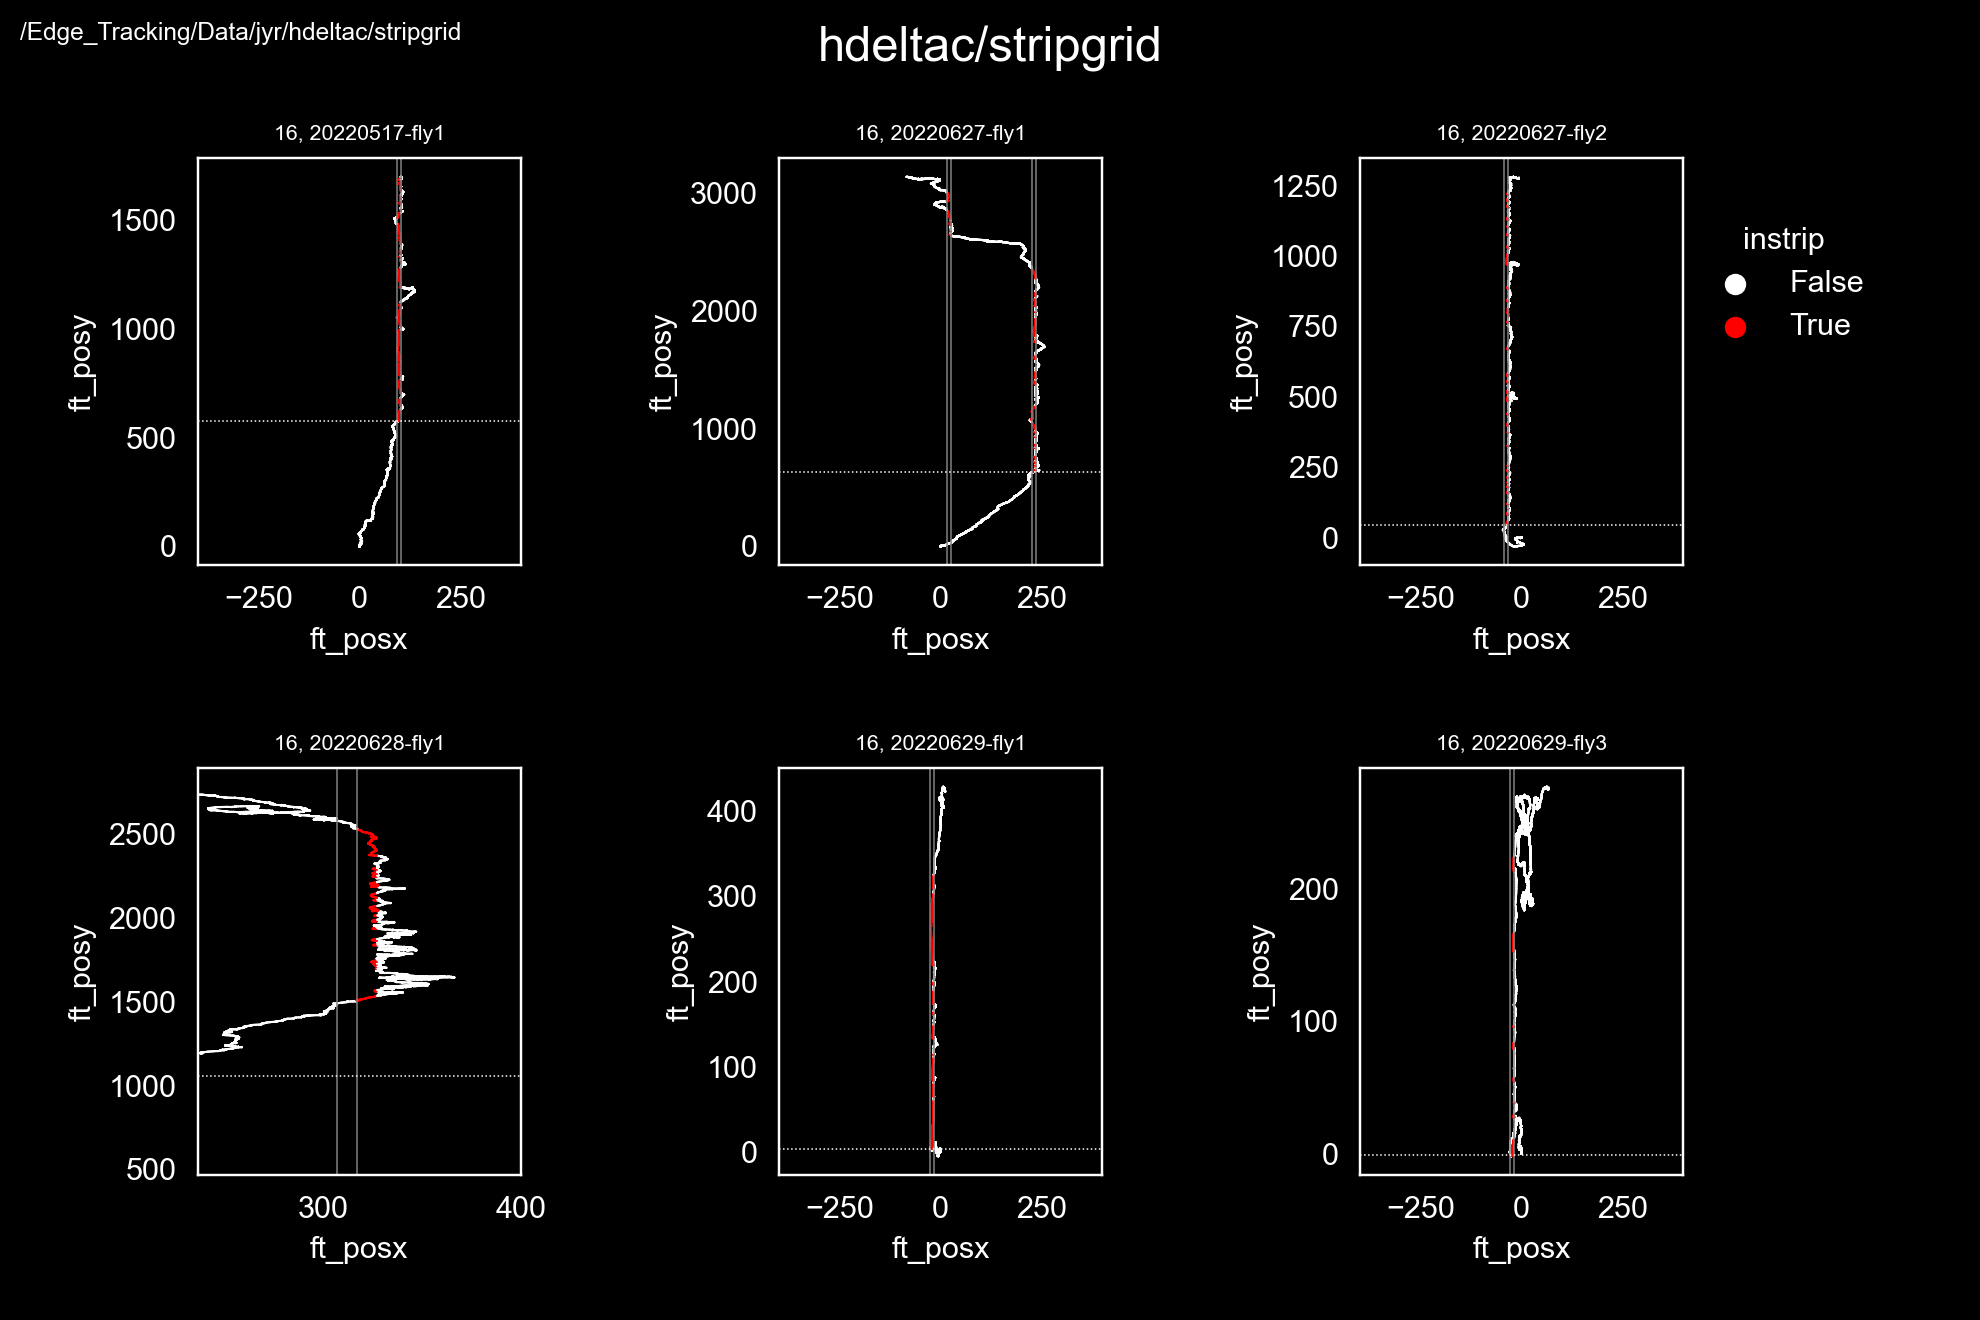

/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avo

In [74]:
hue_varname='instrip'
palette='cool'
start_at_odor = False
odor_lc='lightgray'
odor_lw=0.5
nrows = 2
ncols = 3
palette={True: 'r', False: 'w'}

xmin, xmax = (-500, 500)
ymin, ymax = (-100, 1000)
odor_xmin, odor_xmax = (-100, 100)
fig, axes = pl.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(ncols*3, nrows*3))
ai = 0
#for fi, fpath in enumerate(log_files):
for fly_id, df_ in df_fp.groupby('fly_id'):
    odor_params = butil.get_odor_params(df_, odor_width=odor_width, is_grid=True)
    plotdf = df_[df_['time']>=odor_params['odor_start_time']] if start_at_odor else df_
    # set subplot
    ax = axes.flat[ai]
    butil.plot_trajectory(plotdf, ax=ax,hue_varname=hue_varname, palette=palette,
                         odor_bounds=odor_params['odor_boundary'], plot_legend=True)
    if ai==ncols-1:
        ax.legend(bbox_to_anchor=(0.98, 0.9), ncol=1,
                  loc='upper left', title=hue_varname, frameon=False) 
    else:
        ax.legend_.remove()  
    title = '{}, {}'.format(fi, fly_id)
    ax.set_title(title, fontsize=7)
    ax.set_xlim([-400, 400])
    ai+=1
# remove unused axes
for ix in np.arange(fi+1, nrows*ncols):
    axes.flat[ix].axis('off')
# adjust plots
pl.subplots_adjust(hspace=0.5, wspace=0.8, left=0.1, right=0.85)
fig.suptitle(experiment, fontsize=16)
util.label_figure(fig, fig_id)
figname = 'traj-flipped_all_flies'
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))

In [25]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

# 1 fly

In [214]:
df = df_fp.copy()
df['fly_id'].unique()

array(['20220517-fly1', '20220627-fly1', '20220627-fly2', '20220628-fly1',
       '20220629-fly1', '20220629-fly3'], dtype=object)

20220517-fly1_05172022-113752


/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_14890/2410068948.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = pl.subplots()


<IPython.core.display.Javascript object>


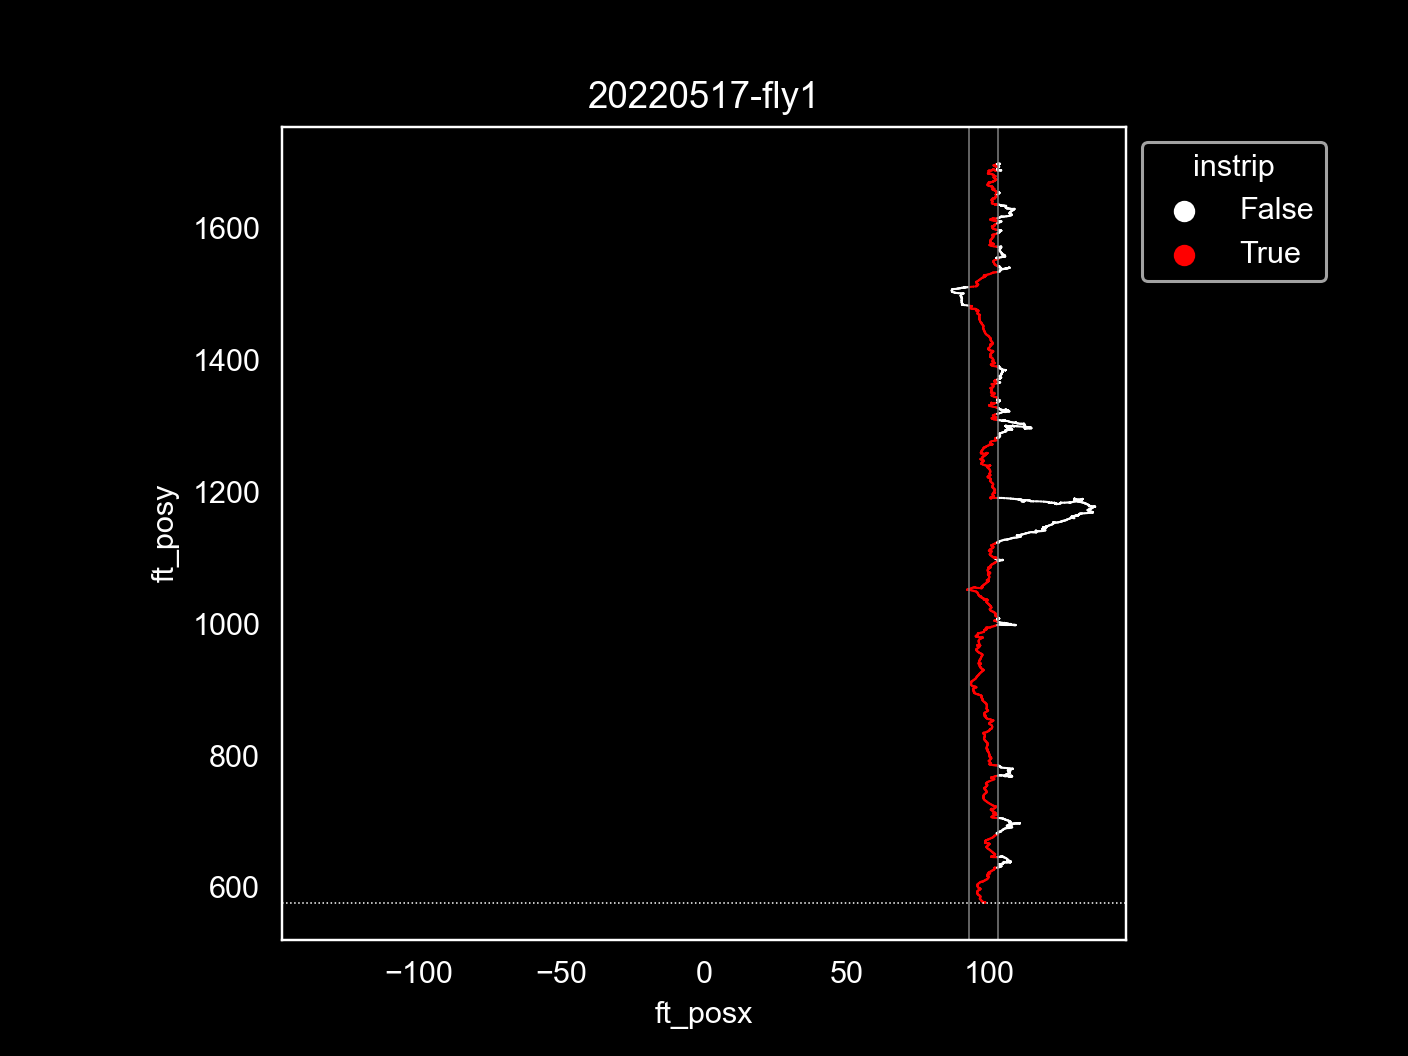

Text(0.5, 1.0, '20220517-fly1')

In [215]:
fly_id = '20220517-fly1'#'20220629-fly3' #'20220530-fly0'
#currcond='hdc_split_60d05_sytjgcamp7f_stripgrid'
df_ = df[(df['fly_id']==fly_id) ].copy()
trial_id = df_['trial_id'].unique()[0]
print(trial_id)
odor_dict = odor_borders[trial_id]
oparams = butil.get_odor_params(df_, odor_width=odor_width, is_grid=True)
df = df_[df_['time']>=oparams['odor_start_time']].copy()
fig, ax = pl.subplots()
ax=butil.plot_trajectory(df, ax=ax,odor_bounds=oparams['odor_boundary'])
ax.set_title(fly_id)
# for x in x_borders:
#     ax.axvline(x=x, c='r', linestyle=':', lw=0.5)

In [216]:
#df = df_.copy()
first_entry_ix = df_[df_['instrip']].iloc[0].name
print(first_entry_ix)
curr_odor_xmin = df_[df_['instrip']].iloc[0]['ft_posx'] - (odor_width/2.)
curr_odor_xmax = df_[df_['instrip']].iloc[0]['ft_posx'] + (odor_width/2.)
print(curr_odor_xmin, curr_odor_xmax)

corridor_starts =  [int(k[1:]) for k, v in odor_dict.items()]

4489
92.888950728061 102.888950728061


In [217]:
i=0
entry_ix = corridor_starts[i]
last_outbout_ix = df_.loc[entry_ix-1].name
print(entry_ix)
start_ = 0 if i==0 else last_outbout_ix
stop_ = corridor_starts[i+1]-1 if len(corridor_starts)>1 else df_.iloc[-1].name
print(start_, stop_)
tmpdf = df_.loc[start_:stop_-1].copy()
entry_left_edge, entry_lefts = butil.check_entry_left_edge(tmpdf, 
                                            entry_ix=entry_ix, return_bool=True)
tmpdf.head()

4489
0 12516


/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \


timestamp -- motor_step_command  mfc1_stpt  mfc2_stpt  mfc3_stpt  \
0  05/17/2022-11:37:52.149648 -- 800000       0.25        0.0        0.0   
1  05/17/2022-11:37:52.170649 -- 800000       0.25        0.0        0.0   
2  05/17/2022-11:37:52.201987 -- 800000       0.25        0.0        0.0   
3  05/17/2022-11:37:52.235247 -- 799999       0.25        0.0        0.0   
4  05/17/2022-11:37:52.267697 -- 800000       0.25        0.0        0.0   

   led1_stpt  led2_stpt  sig_status   ft_posx   ft_posy  ft_frame  ...  \
0        0.0        0.0           0  0.011681  0.000124        31  ...   
1        0.0        0.0           0  0.013350 -0.000569        34  ...   
2        0.0        0.0           0  0.012051 -0.000393        36  ...   
3        0.0        0.0           0  0.011964 -0.000264        38  ...   
4        0.0        0.0           0  0.013133 -0.000560        40  ...   

   cum_time     speed  upwind_speed  crosswind_speed  euclid_dist  \
0  0.000000  0.086034     -0.032989        -0.079457          NaN   
1  0.021001  0.012156     -0.009886        -0.007074     0.001807   
2  0.073340  0.021959      0.004715         0.021447     0.001310   
3  0.158939  0.016665     -0.002547        -0.016470     0.000156   
4  0.276988  0.005109      0.001918        -0.004736     0.001206   

   upwind_dist crosswind_dist  smoothed_ft_posx  smoothed_ft_posy  flipped  
0          NaN            NaN         -0.012078         -0.000107     True  
1    -0.000693       0.001669         -0.012107         -0.000123     True  
2     0.000175       0.001298         -0.012061         -0.000102     True  
3     0.000129       0.000087         -0.012322         -0.000030     True  
4    -0.000297       0.001169         -0.012100          0.000088     True  

[5 rows x 39 columns]

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_14890/4233215881.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = pl.subplots()


<IPython.core.display.Javascript object>


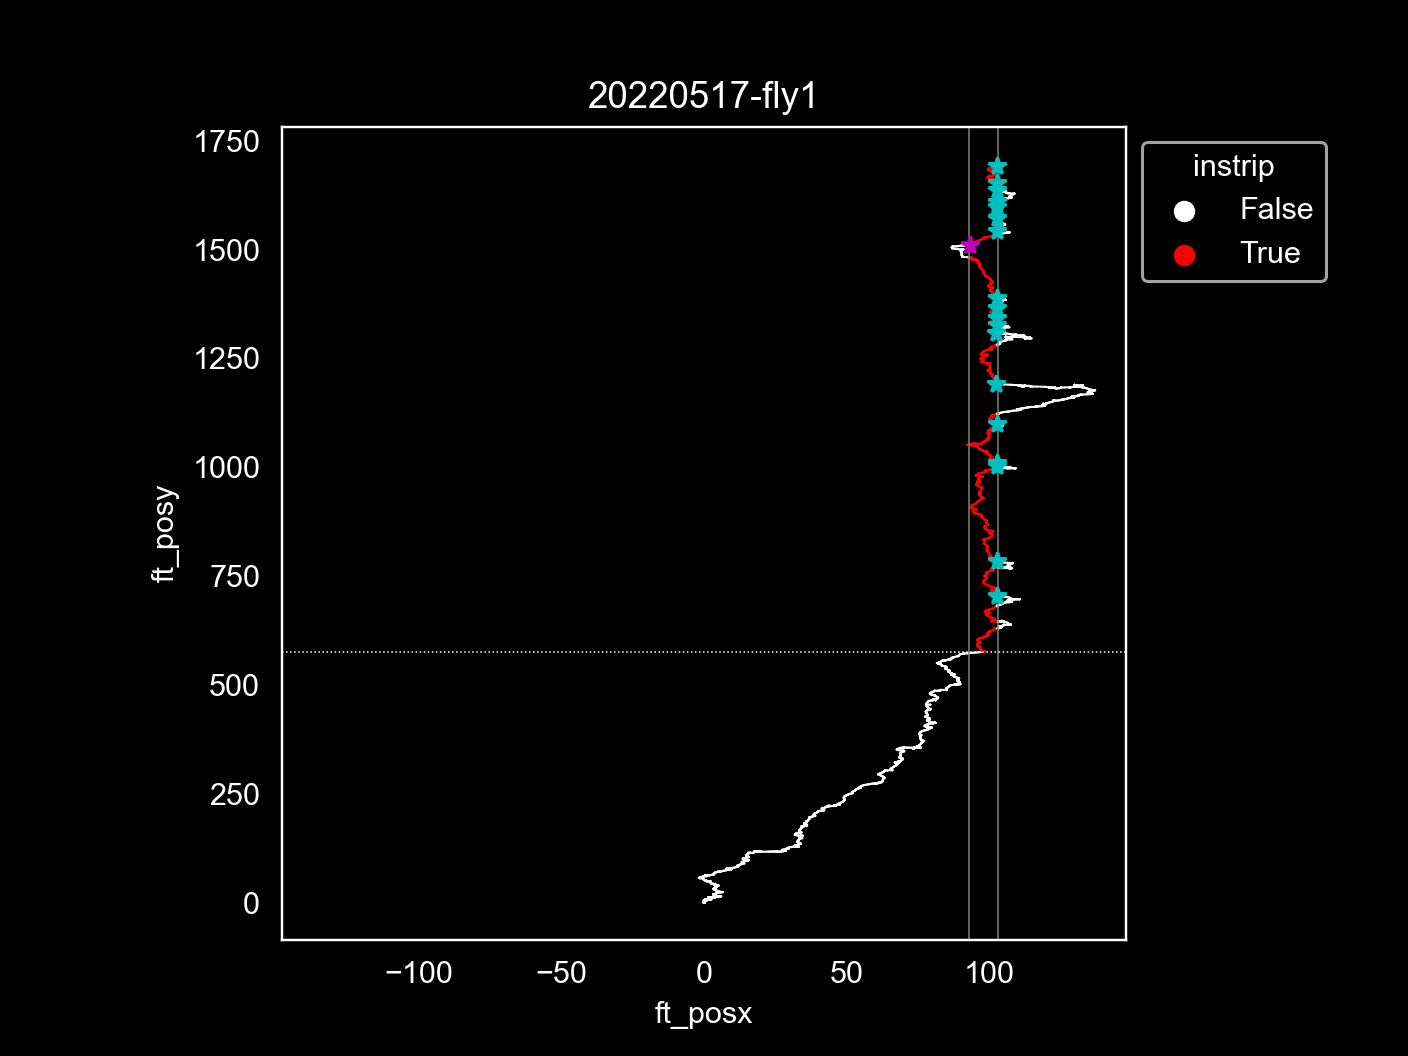

In [218]:
fig, ax = pl.subplots()
ax=butil.plot_trajectory(tmpdf, ax=ax,odor_bounds=oparams['odor_boundary'])
ax.set_title(fly_id)
for (ix, val) in entry_lefts:
    c='m' if val is True else 'c'
    ax.plot(tmpdf.loc[ix]['ft_posx'], 
            tmpdf.loc[ix]['ft_posy'], c=c, marker='*')

In [221]:
df_orig = df0[df0['fly_id']==fly_id].copy()
df_copy, new_borders = butil.check_entryside_and_flip(df_orig, odor_width=odor_width,verbose=True,
                                                      odor_dict=odor_borders[trial_id])
orig_borders = list(odor_borders[trial_id].values())
orig_borders

... 0: True


/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \


[(-102.888950728061, -92.86972136147024)]

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_14890/4227035357.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axn = pl.subplots(1, 2, sharex=True, sharey=True)


<IPython.core.display.Javascript object>


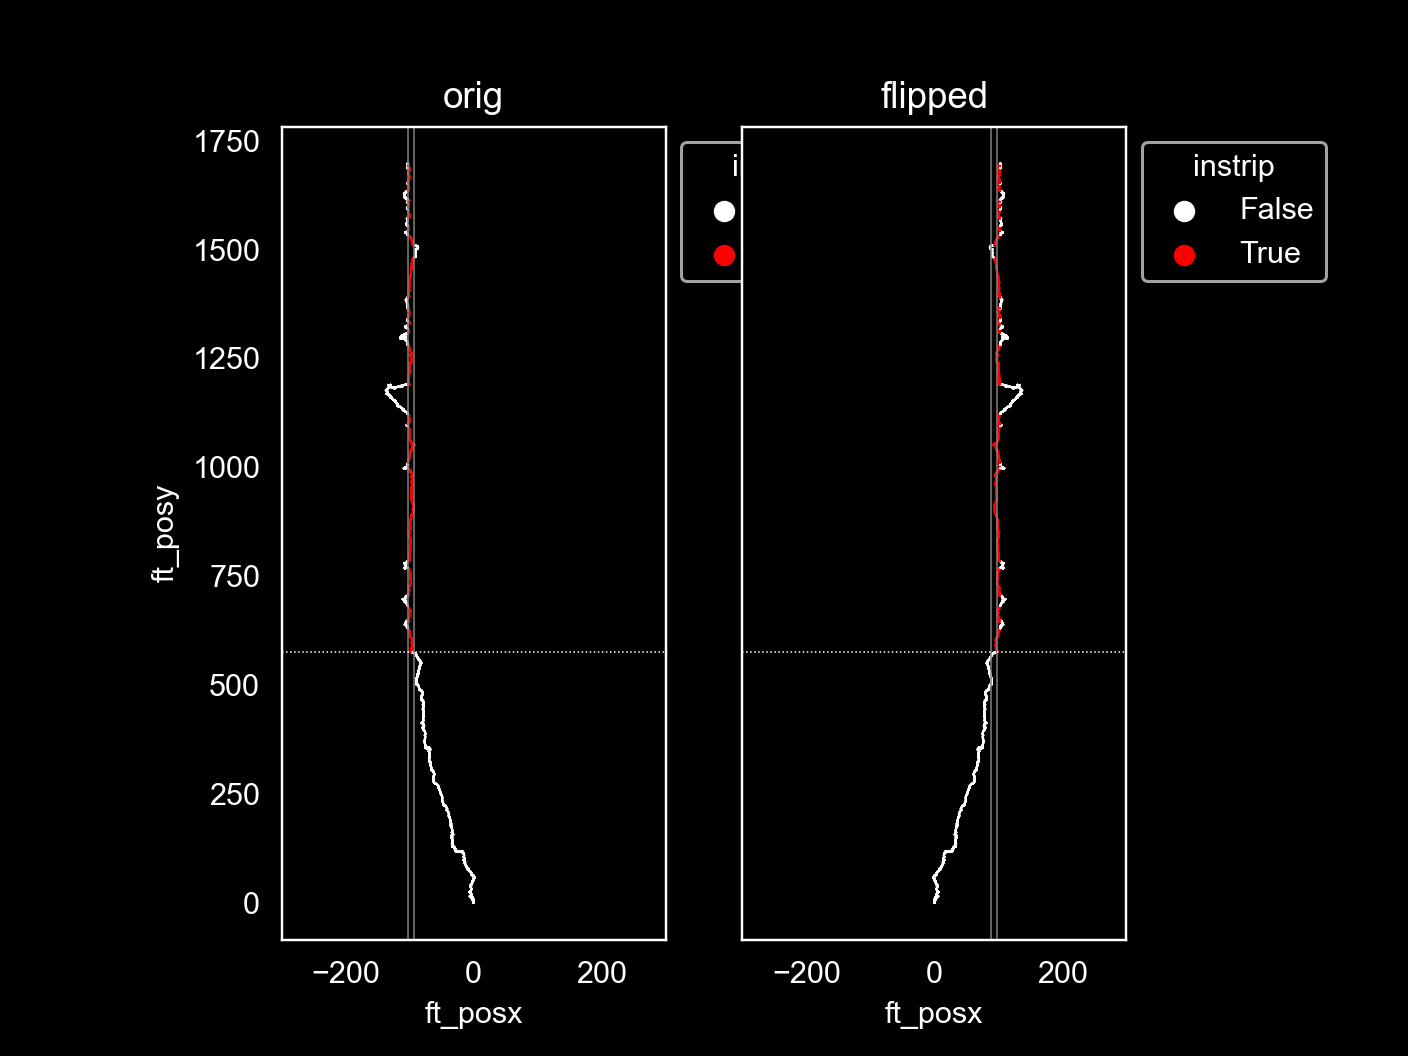

In [222]:
fig, axn = pl.subplots(1, 2, sharex=True, sharey=True)
ax=axn[0]
butil.plot_trajectory(df_orig, ax=ax, odor_bounds=orig_borders, 
                      hue_varname='instrip', title='orig')
ax=axn[1]
butil.plot_trajectory(df_copy, ax=ax, odor_bounds=list(new_borders.values()), 
                      hue_varname='instrip', title='flipped')

for ax in axn:
    ax.set_xlim([-300, 300])

# rdp

In [104]:
df_fp['fly_id'].unique()

array(['20220517-fly1', '20220627-fly1', '20220627-fly2', '20220628-fly1',
       '20220629-fly1', '20220629-fly3'], dtype=object)

In [275]:
df_ = df_fp[df_fp['fly_id']=='20220517-fly1'].copy()

In [276]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [277]:
smooth = False
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
# for varname in ['ft_posx', 'ft_posy']:
#     df = butil.smooth_traces(df, varname=varname, window_size=smooth_window)
# df = butil.smooth_path(df, s=10)
df_ = butil.smooth_traces(df_, window_size=smooth_window, return_same=True)
df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
df_.columns

Index(['timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'sig_status', 'ft_posx',
       'ft_posy', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'ft_heading', 'instrip', 'timestamp', 'motor_step_command', 'time',
       'date', 'led_on', 'experiment', 'fly_name', 'condition', 'trial',
       'fly_id', 'trial_id', 'boutnum', 'rel_time', 'cum_time', 'speed',
       'upwind_speed', 'crosswind_speed', 'euclid_dist', 'upwind_dist',
       'crosswind_dist', 'smoothed_ft_posx', 'smoothed_ft_posy', 'flipped',
       'rdp_ft_posx', 'rdp_ft_posy'],
      dtype='object')

In [227]:
rdp_var='rdp_smoothed_ft_posx' if smooth else 'rdp_ft_posx'
rdp_dists = butil.get_rdp_distances(df_, rdp_var=rdp_var)
sorted_by_dist = rdp_dists\
                    .sort_values(by='crosswind_dist')['boutnum'].unique()
# Get long-ish outbouts
rdp_dist_thresh = 3
incl_bouts = rdp_dists[rdp_dists['crosswind_dist']>rdp_dist_thresh]['boutnum']
print('{} of {} bouts >{} mm'.format(len(incl_bouts), \
                                     len(rdp_dists['boutnum'].unique()), rdp_dist_thresh))
boutdf = df_[df_['boutnum'].isin(incl_bouts)].copy()
outbouts = boutdf[~boutdf['instrip']]['boutnum'].unique()
bouts_to_plot = [b for b in sorted_by_dist if b in outbouts]
# len(bouts_to_plot)
long_dists = rdp_dists[rdp_dists['crosswind_dist']>10]['boutnum']
plot_bouts = [b for b in long_dists if b in bouts_to_plot]
len(plot_bouts)

33 of 43 bouts >3 mm


9

In [228]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

/Users/julianarhee/Repositories/plume-tracking/behavior.py:1166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = pl.subplots(nr, nc, figsize=(nc*2, nr*1.5))


<IPython.core.display.Javascript object>


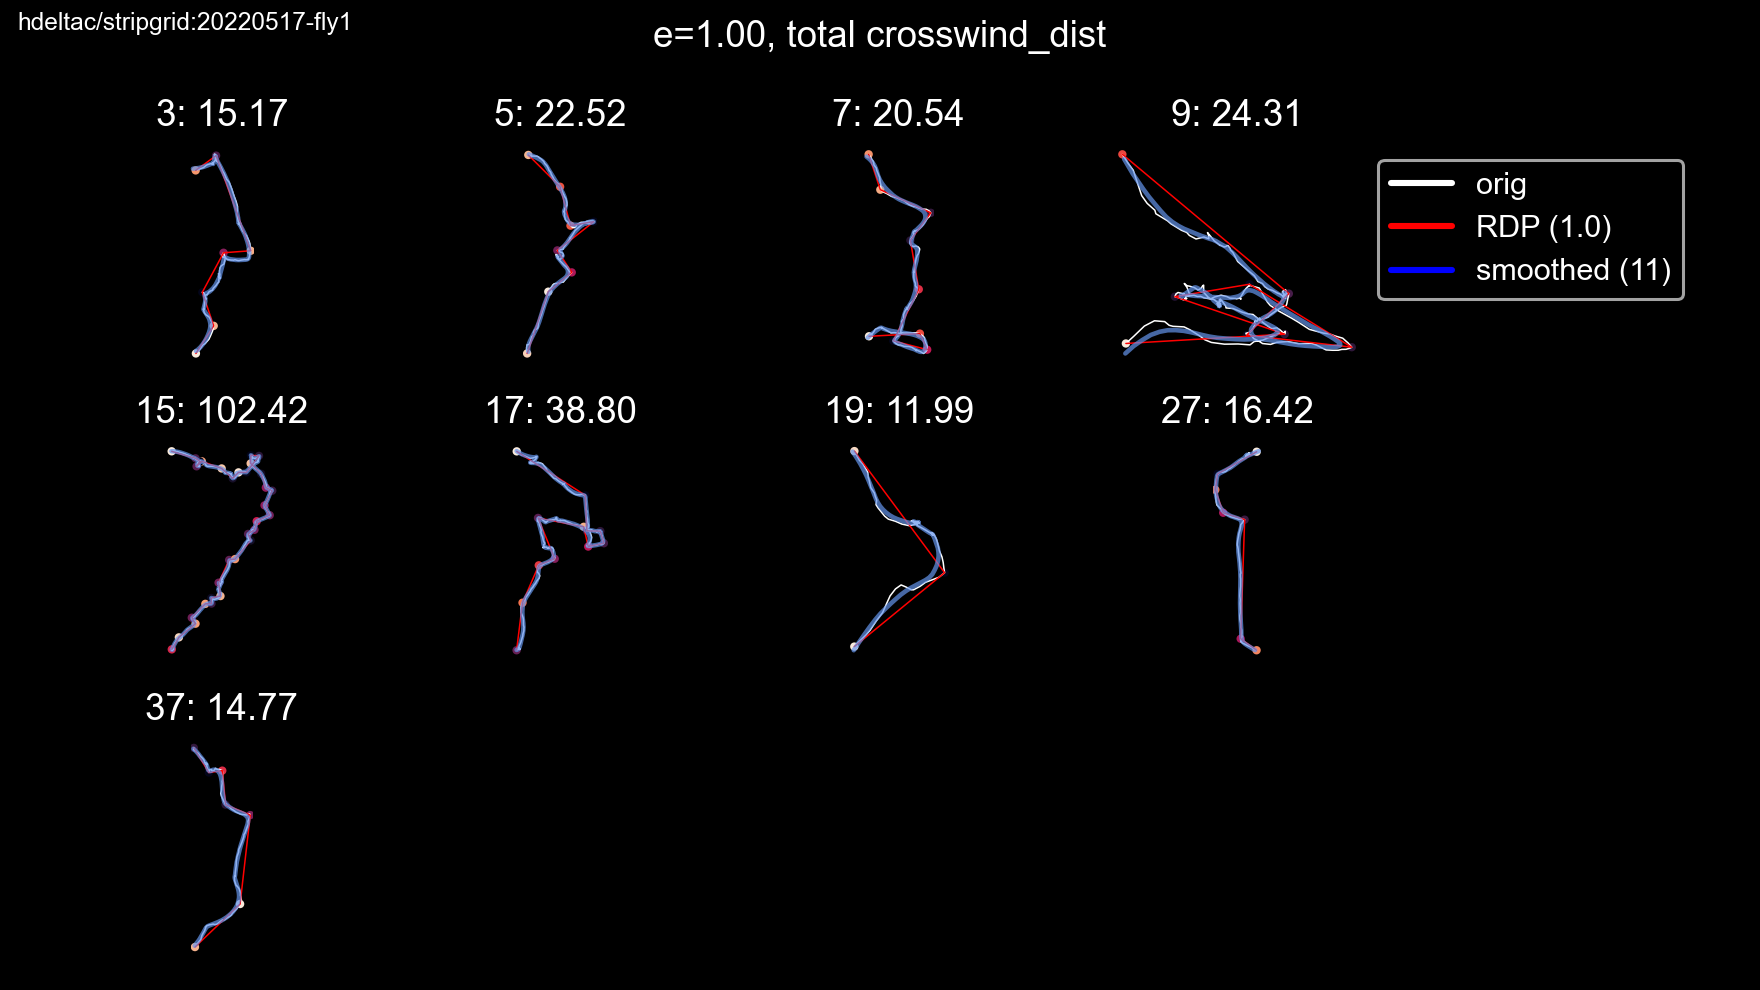

In [229]:
distvar='crosswind_dist'
nr=3
nc=4
plotdf = boutdf[boutdf['boutnum'].isin(plot_bouts)]
fig = butil.plot_overlay_rdp_v_smoothed_multi(plotdf, boutlist=None, nr=nr, nc=nc,
                                  distvar=distvar, xvar=xvar, yvar=yvar)
fig.suptitle('e={:.2f}, total {}'.format(rdp_epsilon, distvar))
util.label_figure(fig, '{}:{}'.format(experiment, fly_id))
pl.tight_layout()

In [157]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

## test heading

In [158]:
import scipy.stats as sts

In [278]:
#boutdf['ft_heading_deg'] = np.rad2deg( boutdf['ft_heading'] ) # heading is 0 to 2*np.pi
# df.loc[df['heading_deg']<0, 'heading_deg'] += 360
# returns the angle in radians in the range -math.pi/2 to +math.pi/2 
# between the positive x-axis and the ray to the point (x, y) ≠ (0, 0)
df_['heading'] = np.arctan2(np.gradient(df_[xvar]), \
                               np.gradient(df_[yvar])) # -npi. pi
#boutdf['heading_test'] = abs(make_continuous(rots)) # -2*np.pi to 2*pi?
#boutdf['heading_cont'] = convert_cw(boutdf['heading']) # 0 to 2*np.pi  
df_['ft_heading_deg'] = np.rad2deg(df_['ft_heading'])

In [279]:
df_['heading'].min(),df_['heading'].max()

(-3.1415746974720182, 3.1393587602485433)

In [280]:
df_['ft_heading_deg'].min(), df_['ft_heading_deg'].max()

(0.0051031715155075725, 359.99570804780814)

##### test 1

In [281]:
curr_savedir = os.path.join(os.path.split(save_dir)[0], 'flipped')
if not os.path.exists(curr_savedir):
    os.makedirs(curr_savedir)
print(curr_savedir)

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped


In [282]:
bnum = 15#43 #11 #37 #45 #31 #17 #17
df_ = butil.get_speed_and_stops(df_, speed_thresh=1.0, stopdur_thresh=0.5)
b_ = df_[df_['boutnum']==bnum].copy()

<IPython.core.display.Javascript object>


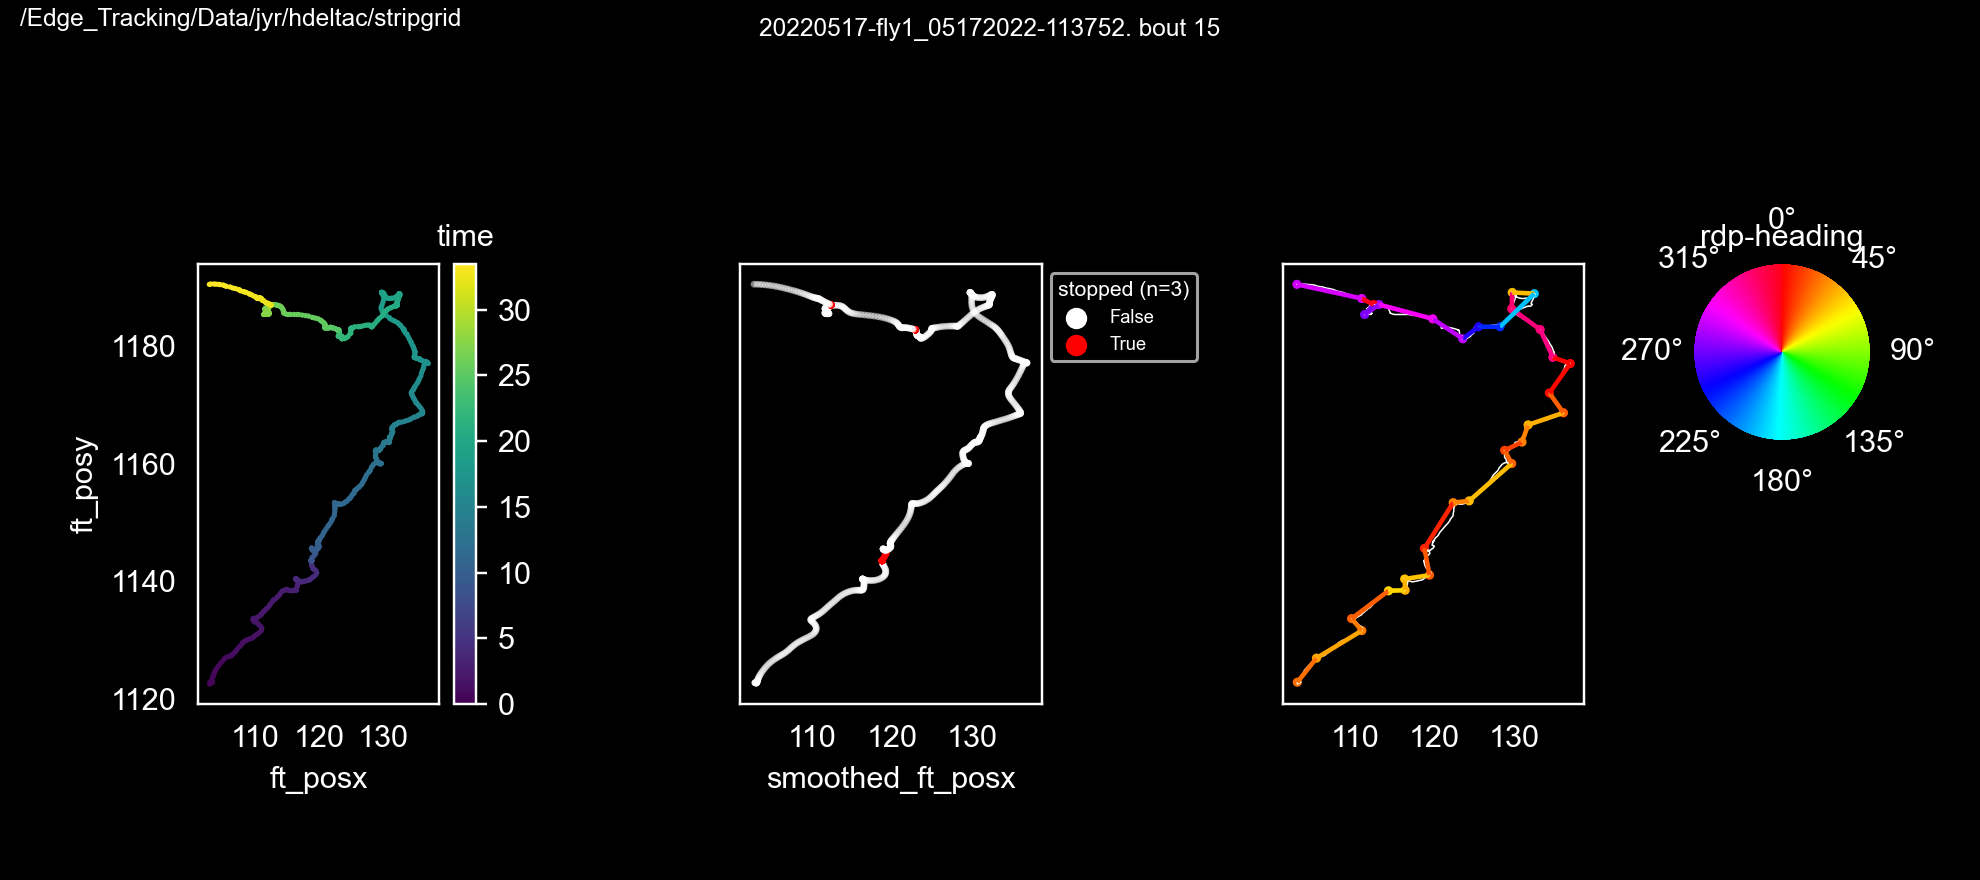

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout15


In [283]:
fig, axn = pl.subplots(1, 3, figsize=(9, 4), sharex=True, sharey=True)
ax=axn[0]
cmap = pl.get_cmap("viridis")
b_['time'] -= b_['time'].iloc[0]
norm = pl.Normalize(b_['time'].min(), b_['time'].max())
sns.scatterplot(data=b_, x="ft_posx", y="ft_posy", ax=ax,
                hue='time', s=3, edgecolor='none', palette=cmap, legend=False)
#ax.legend(bbox_to_anchor=(-0.2, 1.), ncols=2, loc='lower left', title='time')
sm =  mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.ax.set_title("time", fontsize=10)
cbar.ax.tick_params(labelsize=10)
# ---------------------
ax=axn[1]
sns.scatterplot(data=b_.iloc[0::1], x="smoothed_ft_posx", y="smoothed_ft_posy", ax=ax,
                hue='stopped', s=5, edgecolor='none', palette={True: 'r', False: 'w'}, alpha=0.5)
n_stops_in_bout = len(b_[b_['stopped']]['stopboutnum'].unique())
leg = ax.legend(bbox_to_anchor=(1, 1.), ncols=1, loc='upper left', \
          title='stopped (n={})'.format(n_stops_in_bout), fontsize=6)
ax.get_legend()._legend_box.align = "left"
pl.setp(leg.get_title(),fontsize='x-small')
# ---------------------
ax=axn[2]; #ax.set_title('rdp-heading')
rdp_x ='rdp_{}'.format(xvar)
rdp_y ='rdp_{}'.format(yvar)
xv = b_[b_[rdp_x]][xvar]
yv = b_[b_[rdp_y]][yvar]
angles = butil.convert_cw(np.arctan2(np.gradient(xv*3), np.gradient(yv*3)) )
# -- 
ax.plot(b_[xvar], b_[yvar], 'w', lw=0.5)
ax.scatter(b_[b_[rdp_x]][xvar], b_[b_[rdp_y]][yvar], 
        c=angles, cmap='hsv', s=4)
xy = b_[b_[rdp_var]][[xvar, yvar]].values
xy = xy.reshape(-1, 1, 2)
segments = np.hstack([xy[:-1], xy[1:]])
coll = mpl.collections.LineCollection(segments, cmap='hsv') #plt.cm.gist_ncar)
coll.set_array(angles) #np.random.random(xy.shape[0]))
ax.add_collection(coll)
# legend
theta_range = (0, 2*np.pi)
cax = util.add_colorwheel(fig, axes=[0.8, 0.5, 0.2, 0.2], theta_range=theta_range, cmap='hsv') 
cax.set_title('rdp-heading', fontsize=10)
# -----
pl.subplots_adjust(right=0.8, top=0.7, wspace=0.8, bottom=0.2, left=0.1)
fig.suptitle('{}. bout {}'.format(trial_id, bnum), fontsize=8)
util.label_figure(fig, fig_id)

figname = 'heading-at-stops_{}_bout{}'.format(trial_id, bnum)
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

In [292]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

<IPython.core.display.Javascript object>


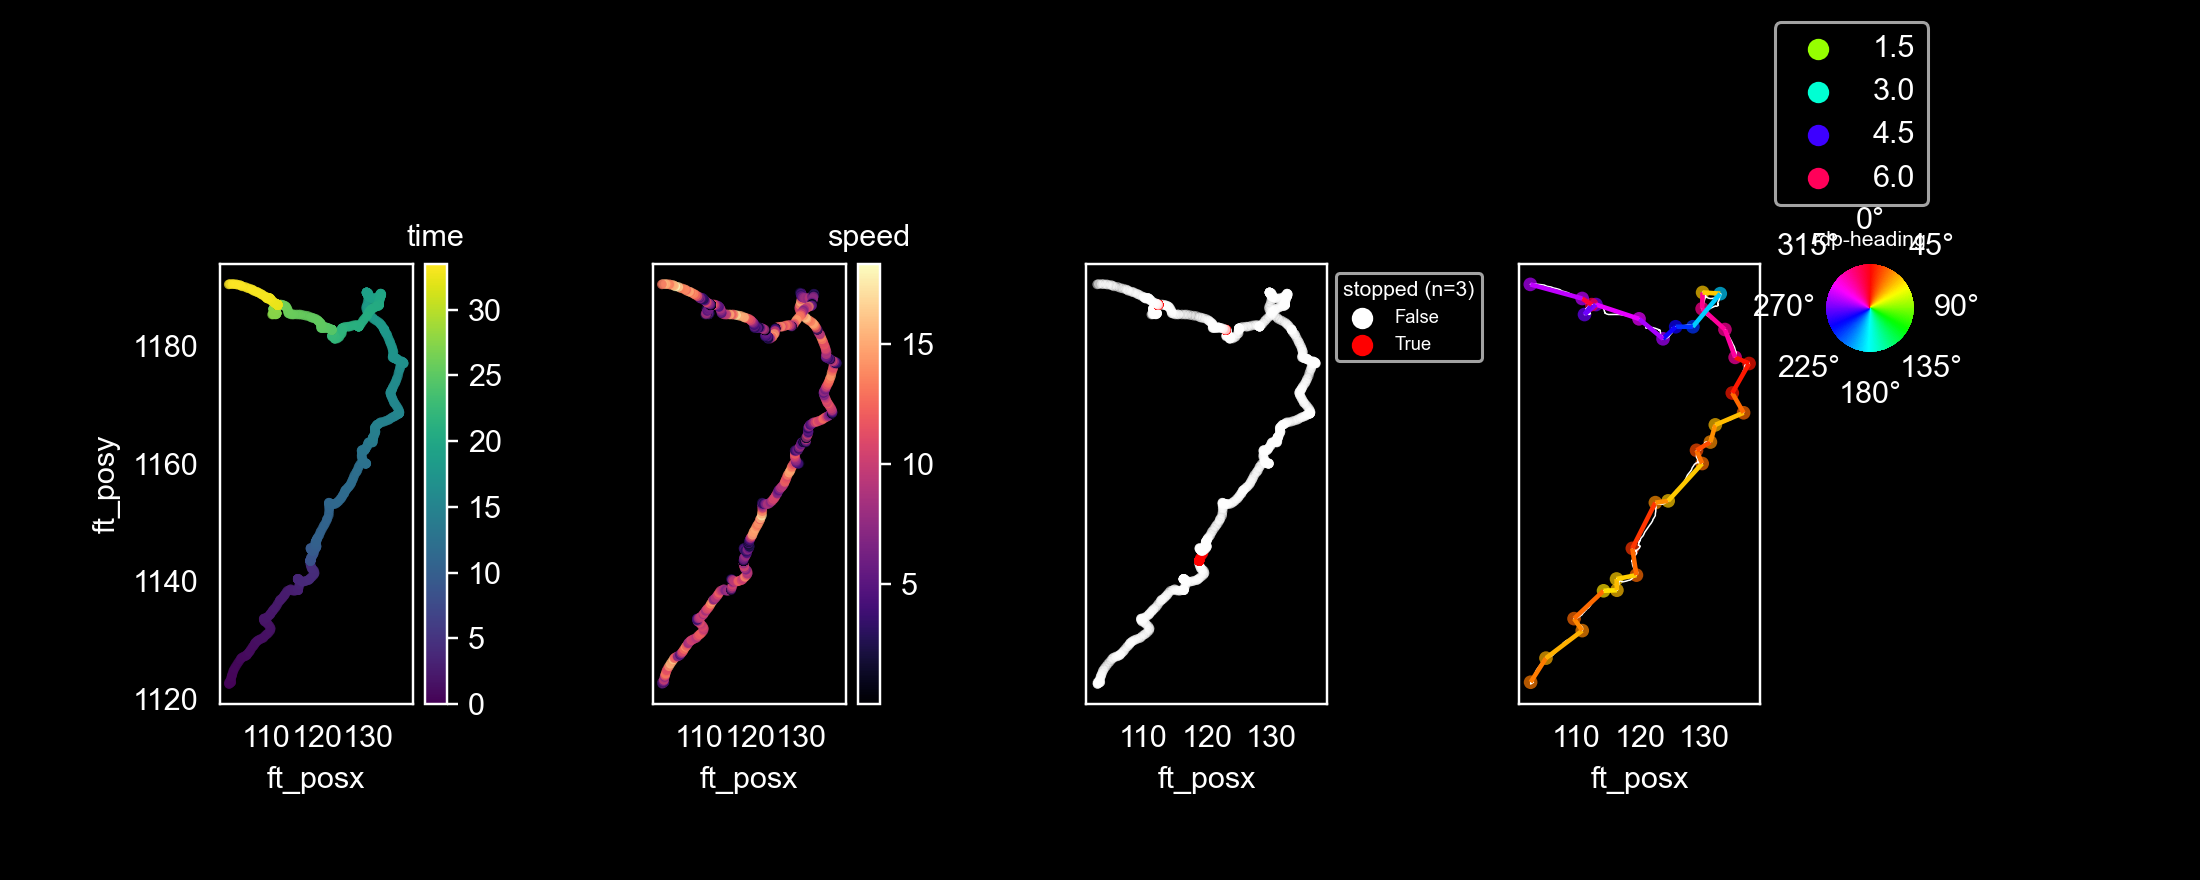

In [293]:
fig = butil.examine_heading_at_stops(b_, xvar=xvar, yvar=yvar, theta_range=theta_range, show_angles=True)


In [302]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [312]:
def wrap(arr, cmin=-np.pi, cmax=np.pi):
    period = cmax - cmin
    arr = arr%period
    arr[arr>=cmax] = arr[arr>=cmax] - period
    arr[arr<cmin] = arr[arr<cmin] + period
    return arr
def unwrap(signal, period=2*np.pi):
    unwrapped = np.unwrap(signal*2*np.pi/period)*period/np.pi/2
    return unwrapped

In [344]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [350]:
b_['ft_heading2'] = -wrap(unwrap(b_['ft_heading'].copy()))
b_['ft_heading2'].min(), b_['ft_heading2'].max()


(-3.1369585562749998, 3.0257396669626866)

<IPython.core.display.Javascript object>


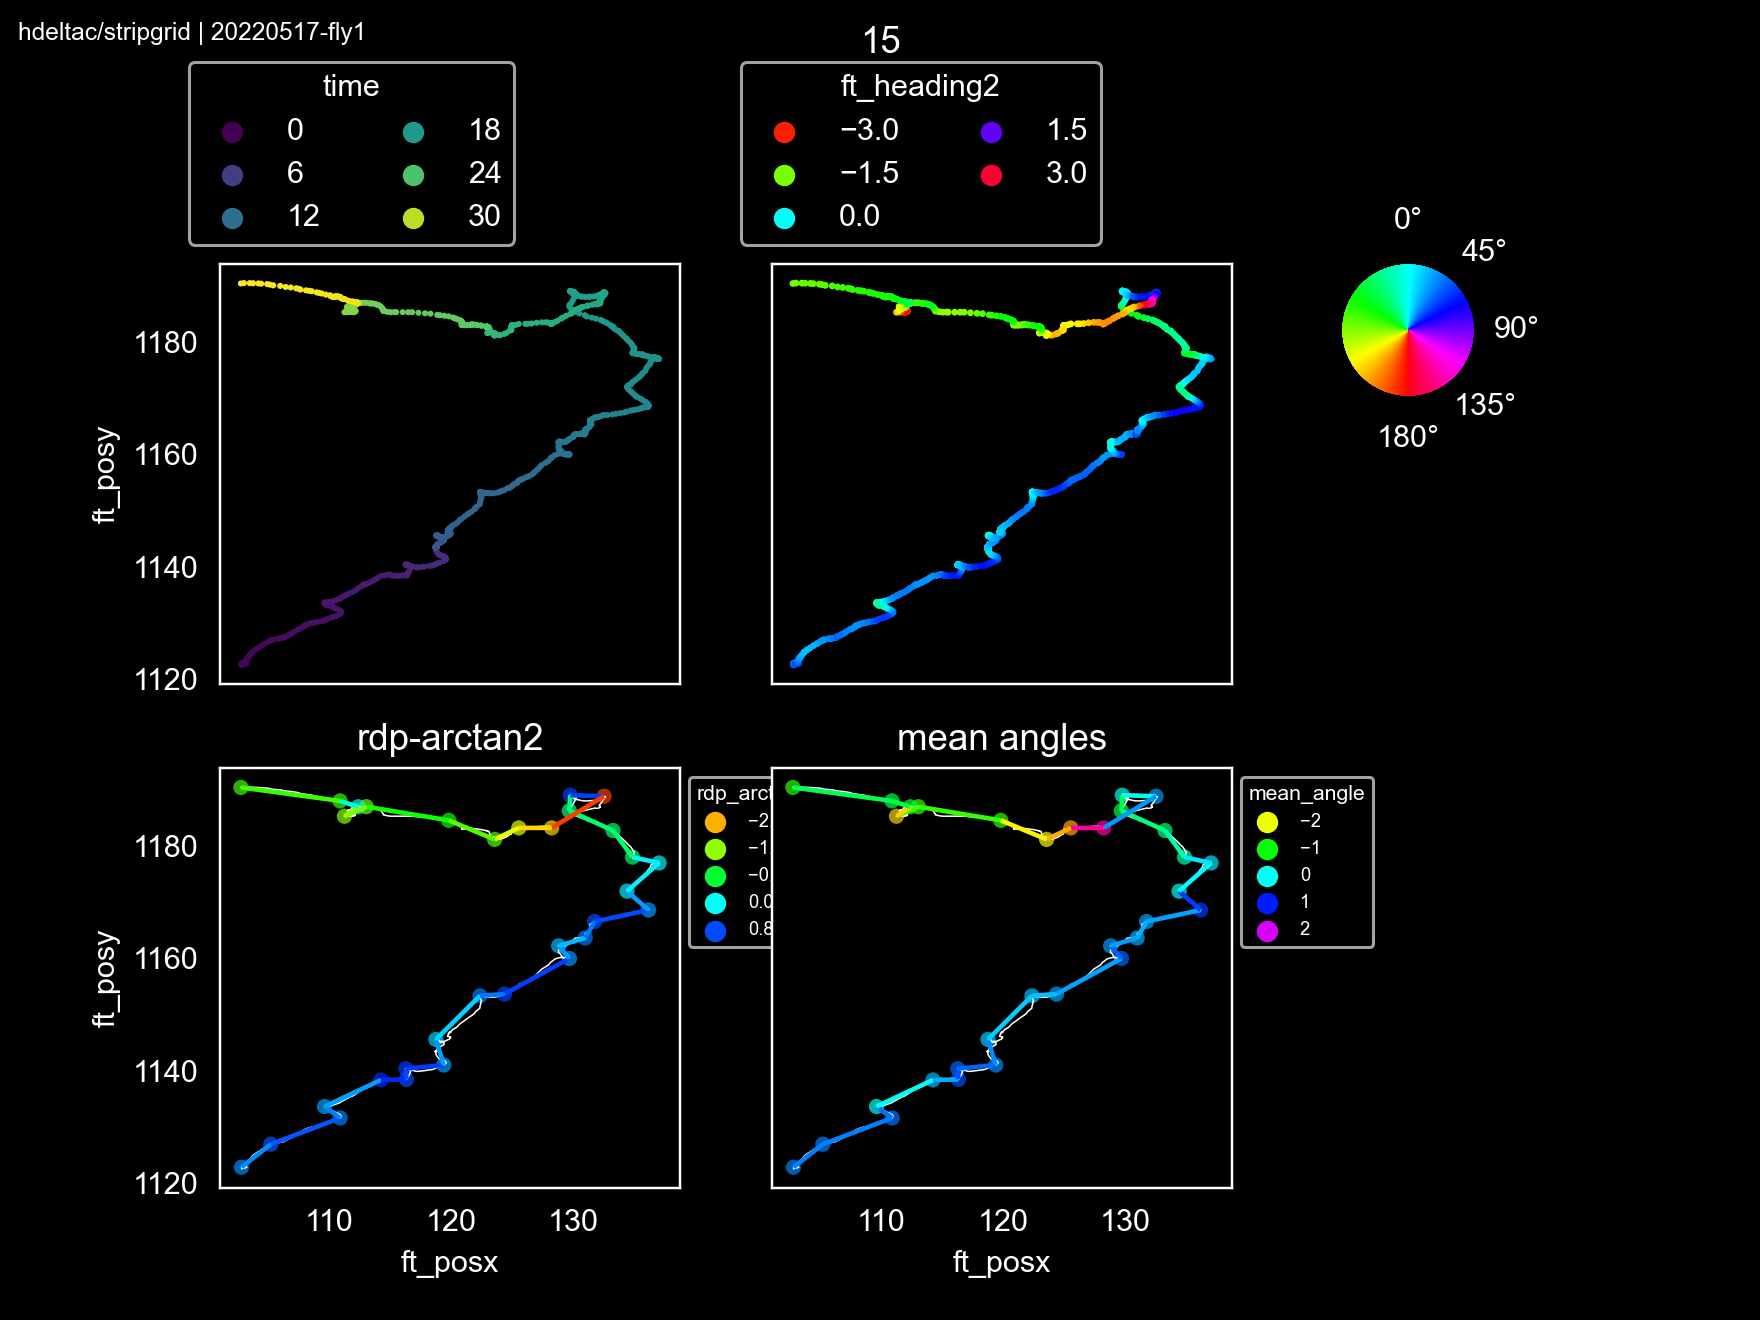

-np.pi tp pi
mean angles: (-2.41, 2.57)


In [354]:
theta_range=(-np.pi, np.pi)
fig = butil.examine_heading_in_bout(b_, theta_range=theta_range, show_angles=True,
                                xvar=xvar, yvar=yvar, heading_var_og='ft_heading2',
                                heading_var='ft_heading2')
fig.suptitle(bnum)
pl.subplots_adjust(right=0.7, top=0.8, bottom=0.1)
util.label_figure(fig, '{} | {}'.format(experiment, fly_id))


In [305]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

<IPython.core.display.Javascript object>


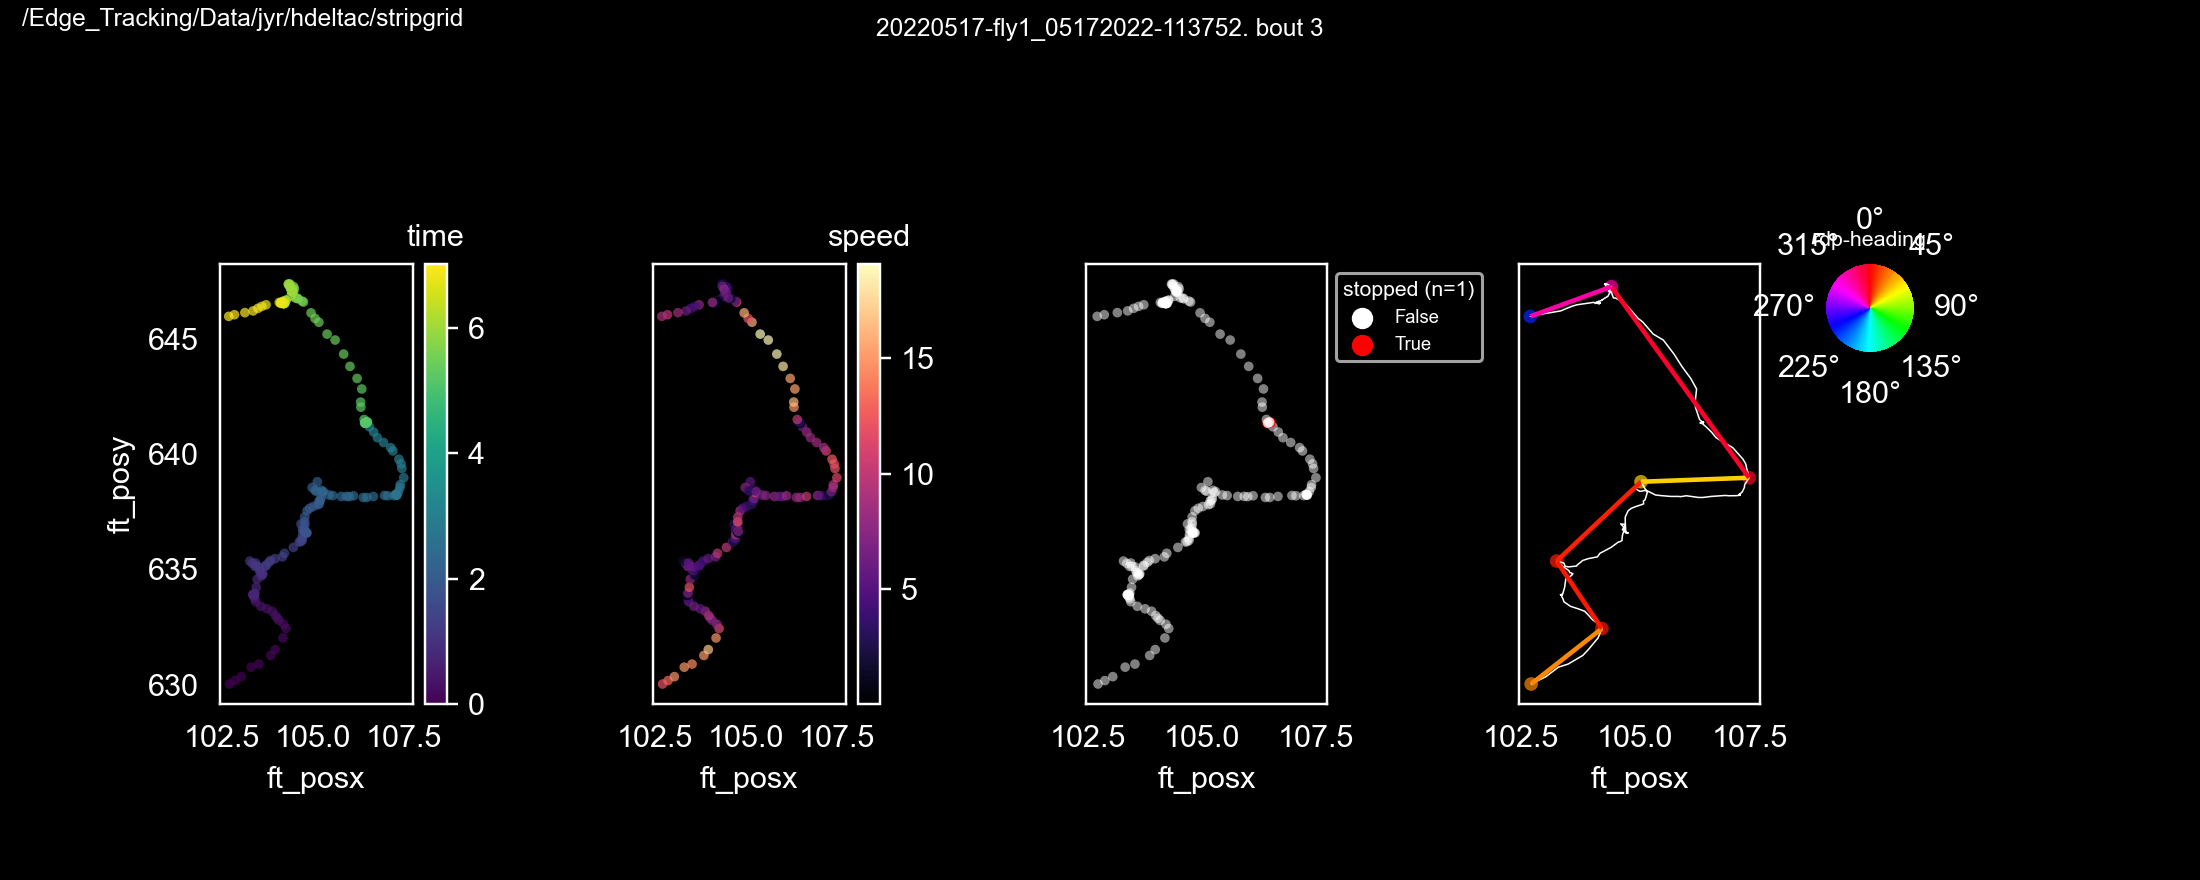

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout3


<IPython.core.display.Javascript object>


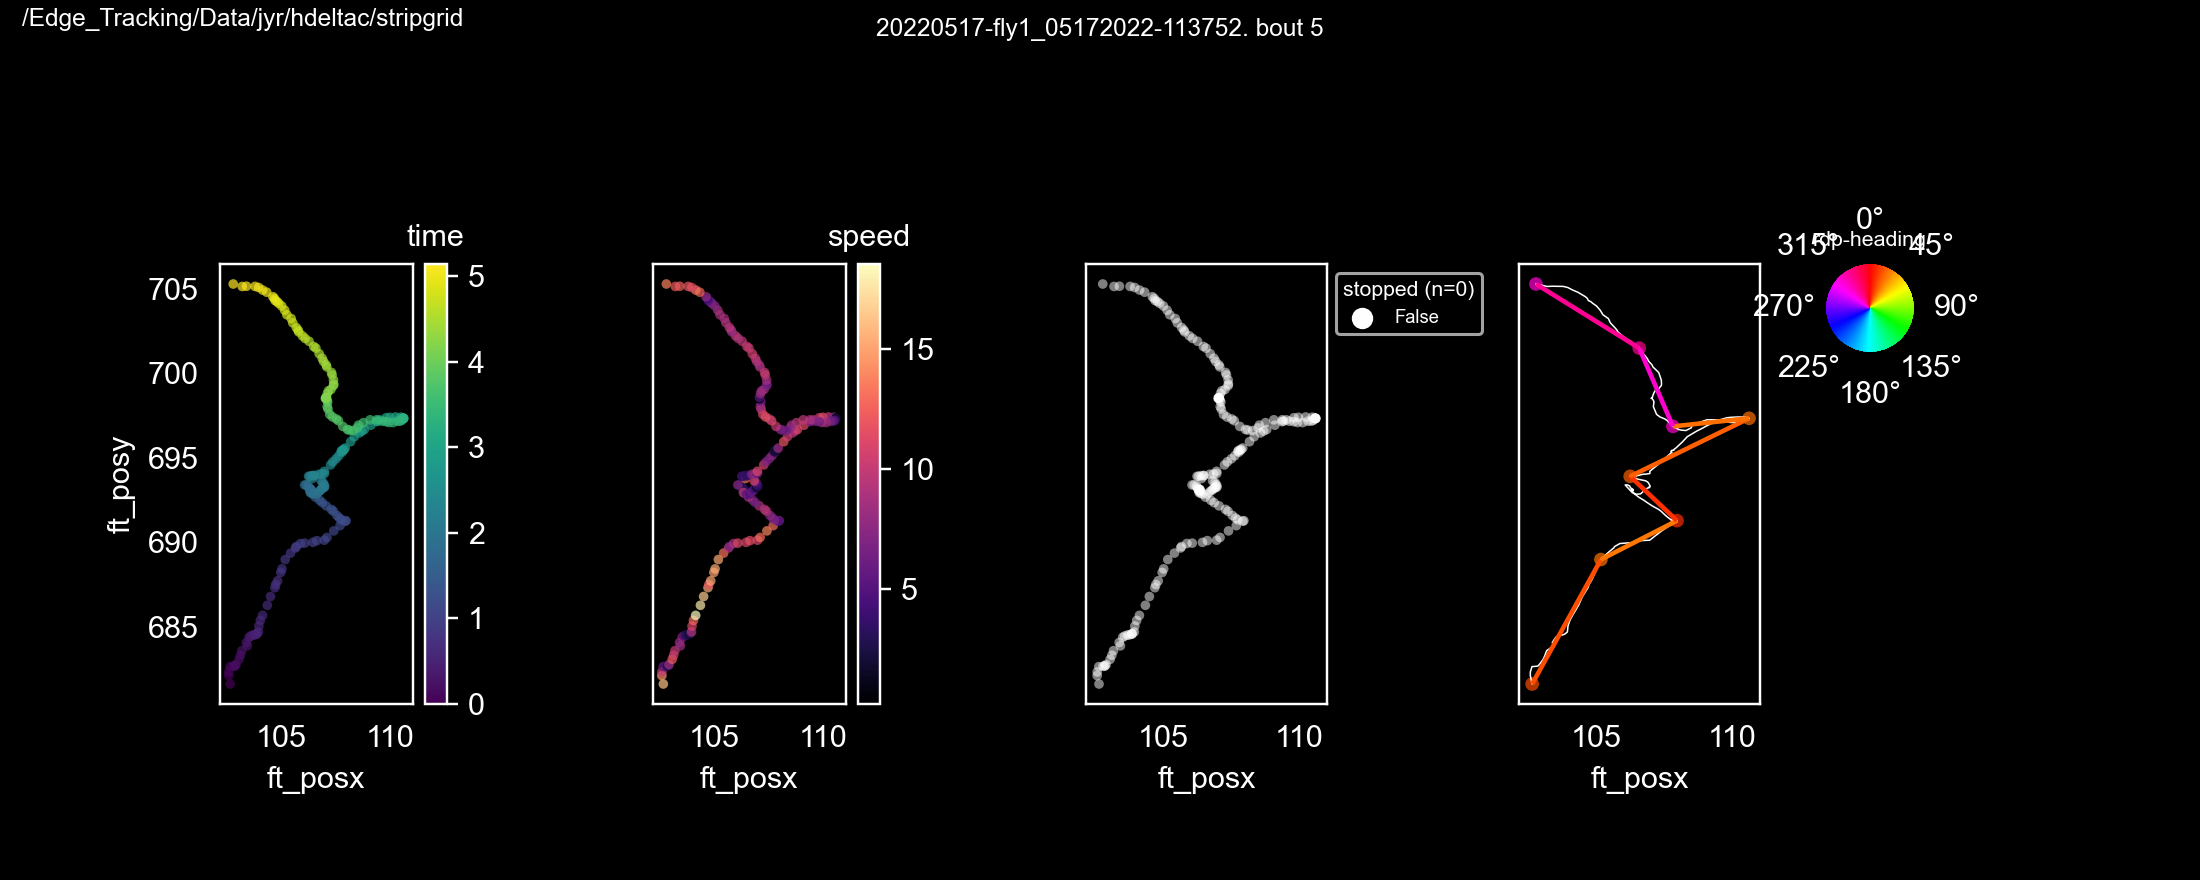

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout5


<IPython.core.display.Javascript object>


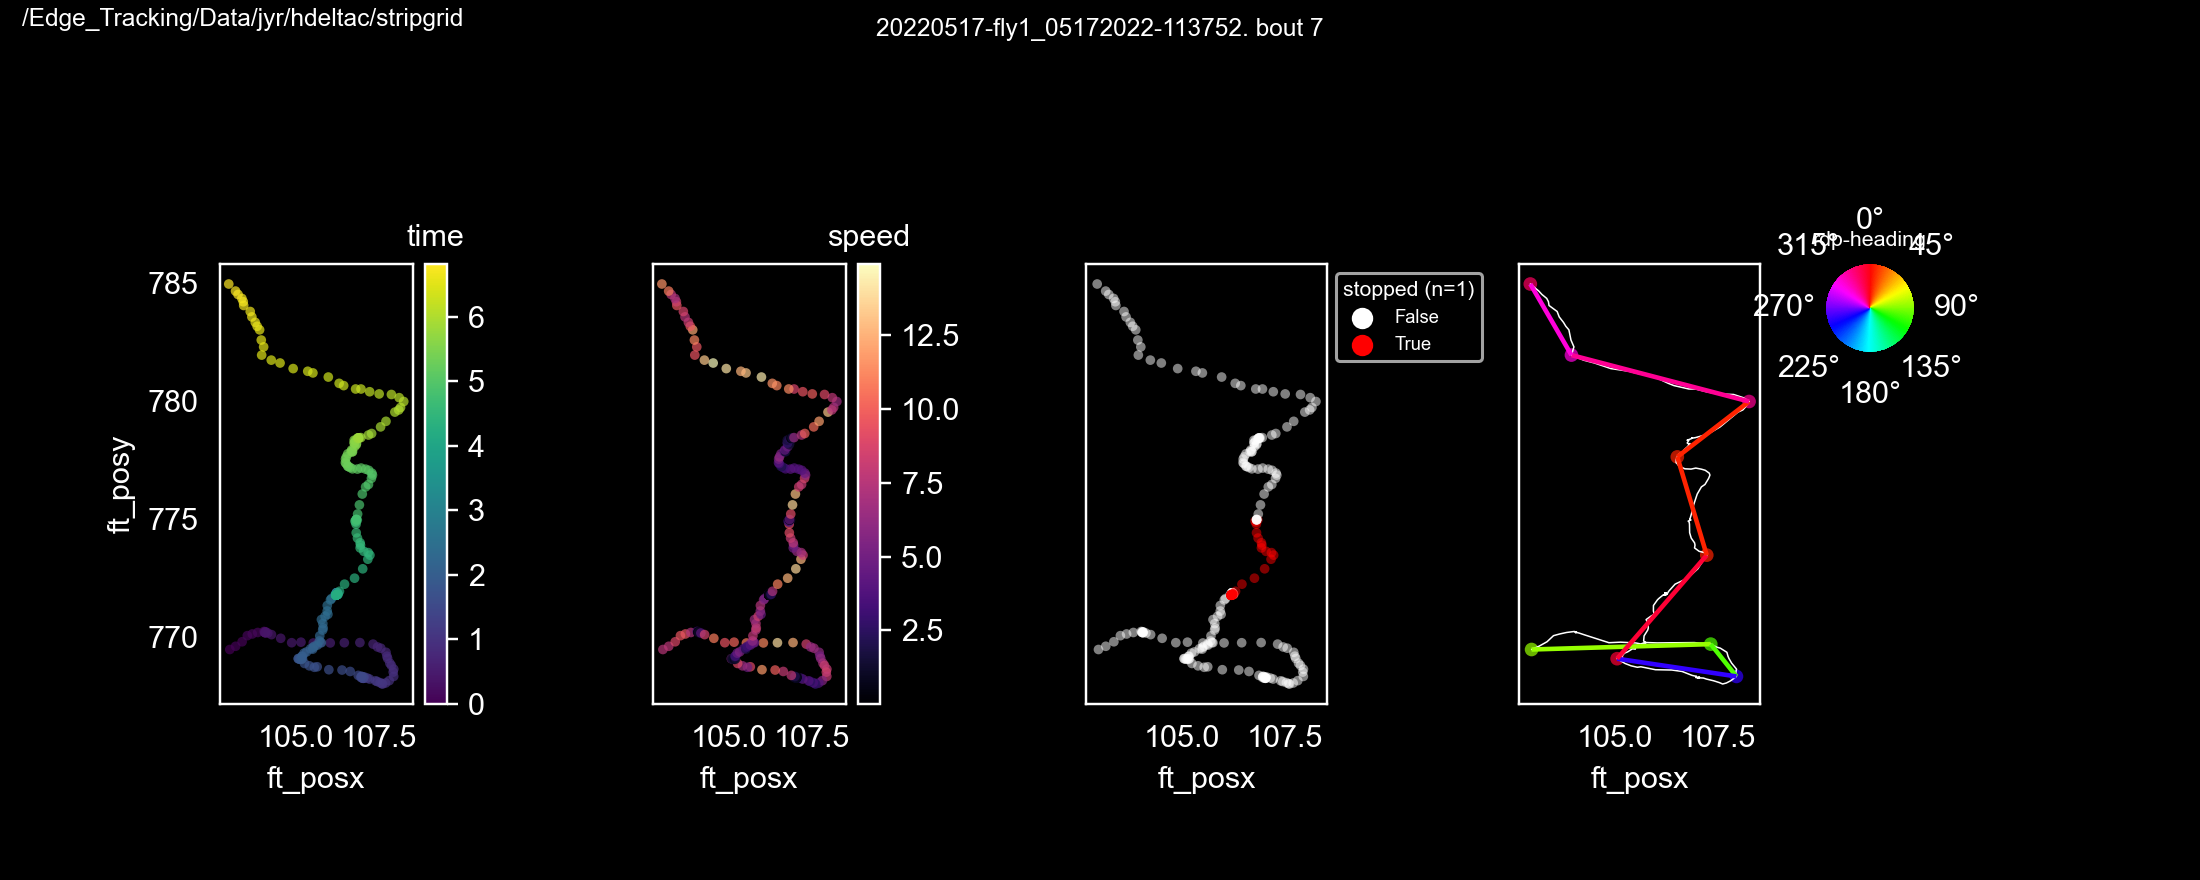

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout7


<IPython.core.display.Javascript object>


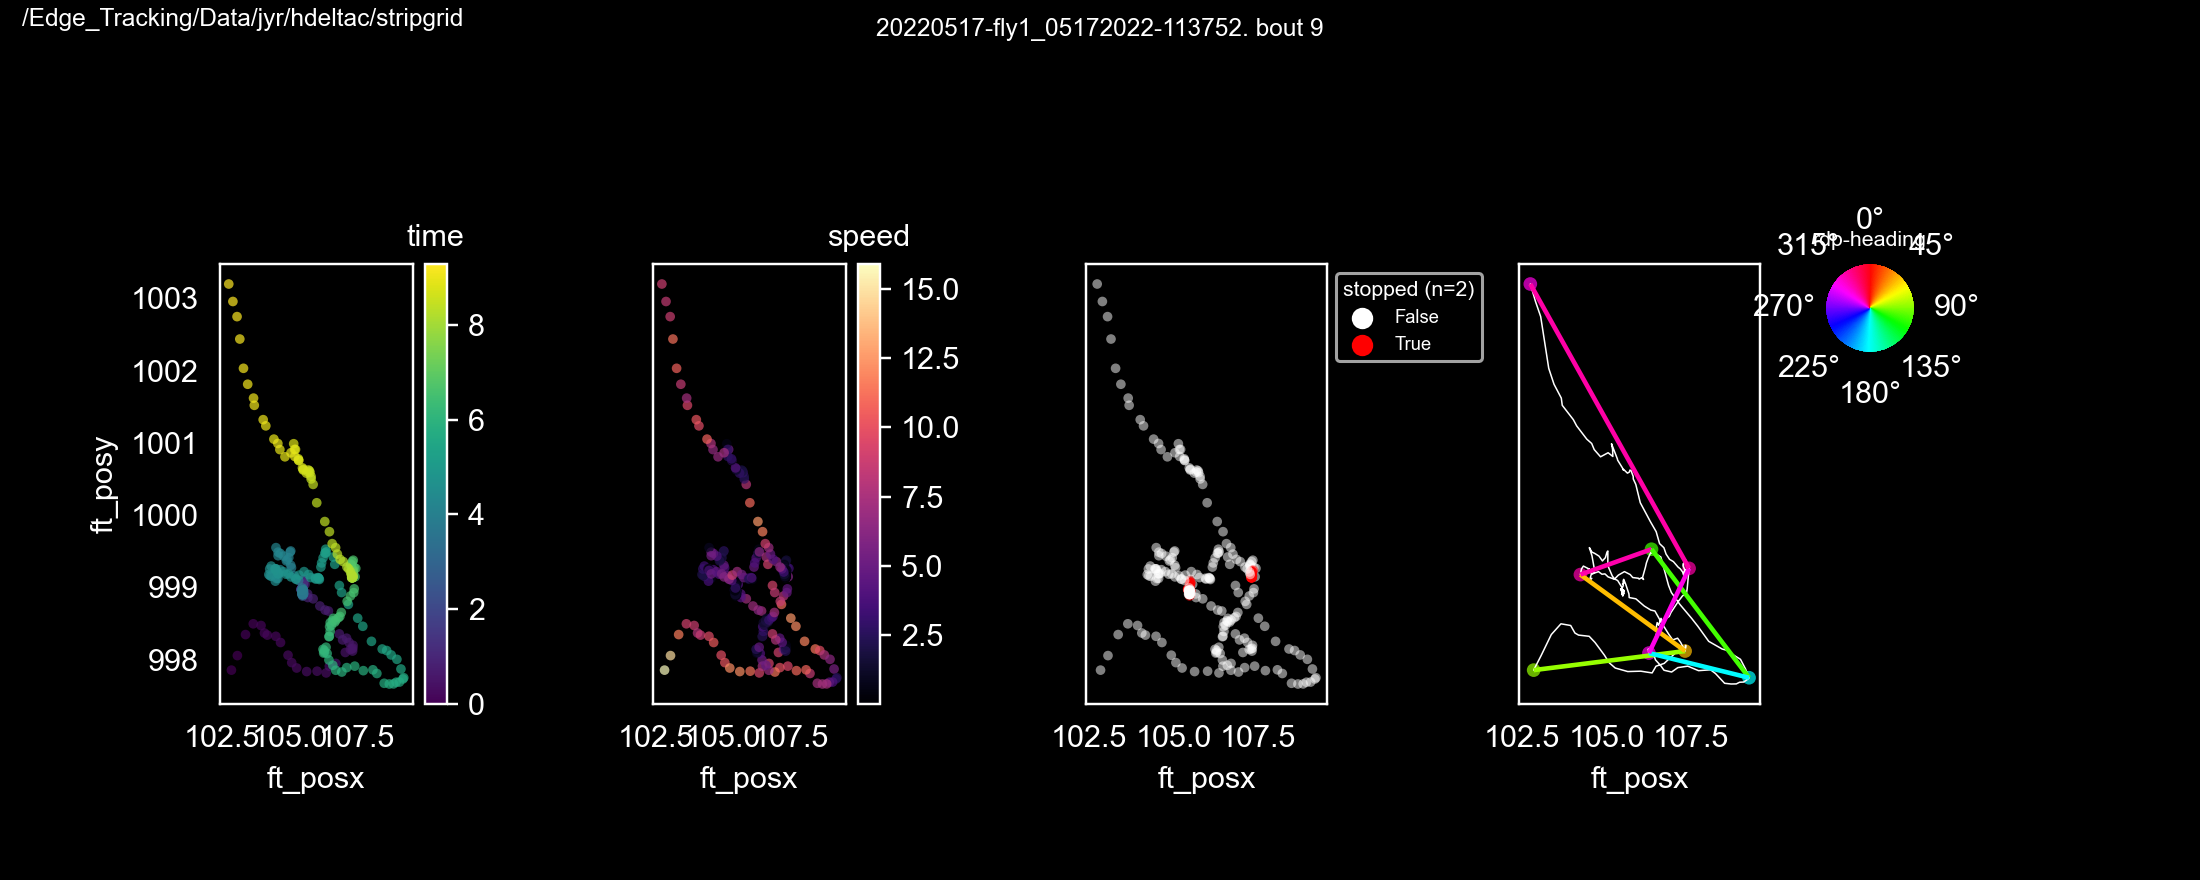

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout9


<IPython.core.display.Javascript object>


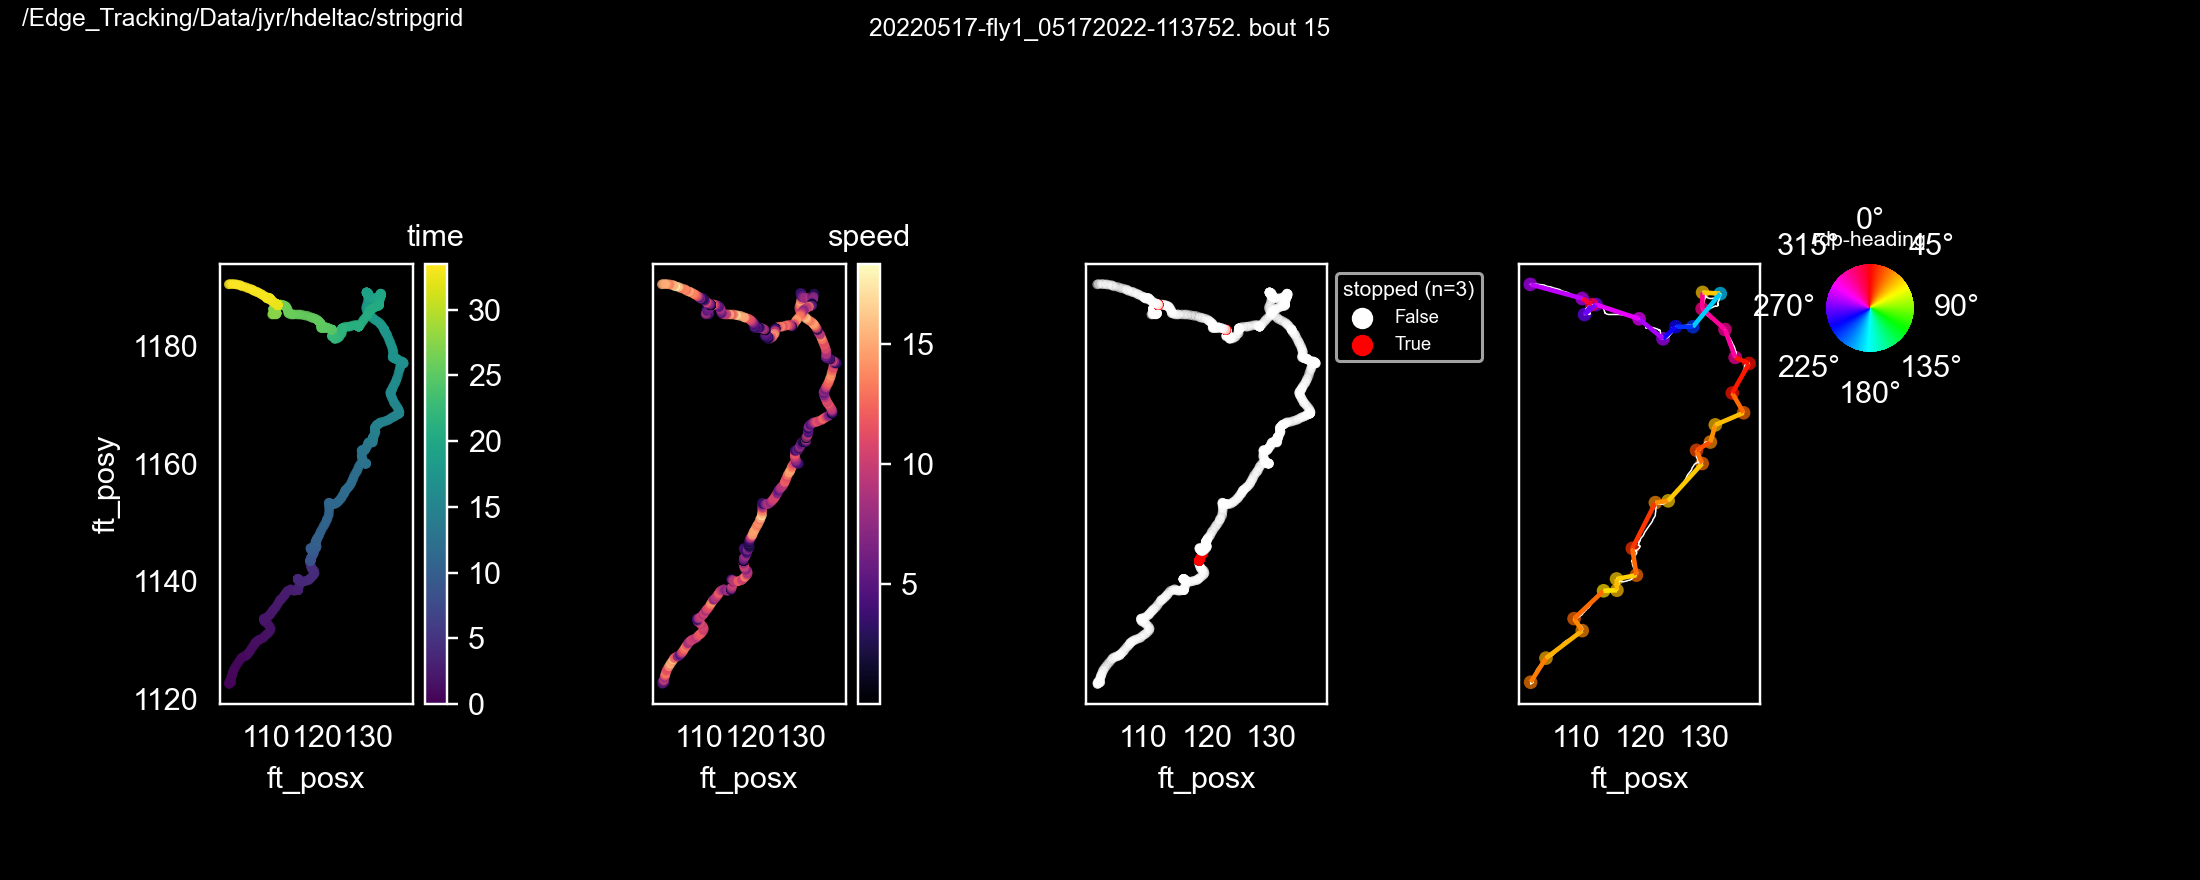

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout15


<IPython.core.display.Javascript object>


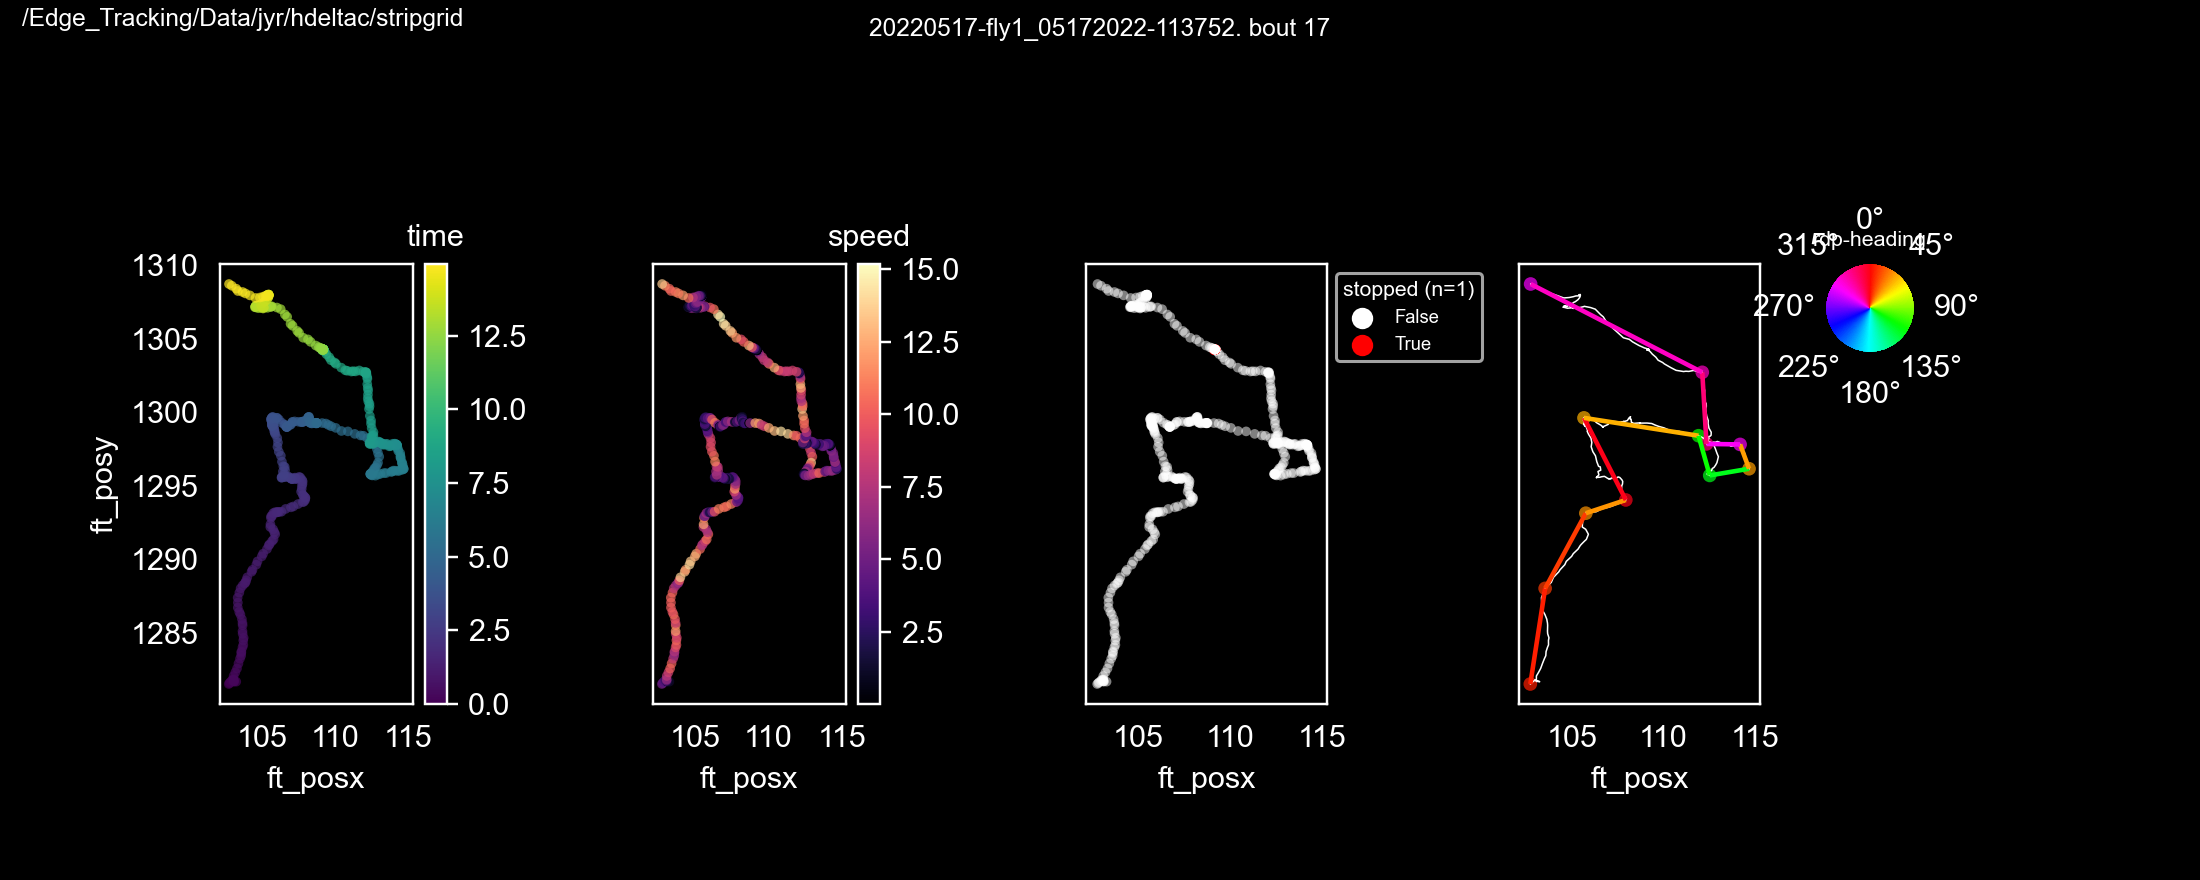

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout17


<IPython.core.display.Javascript object>


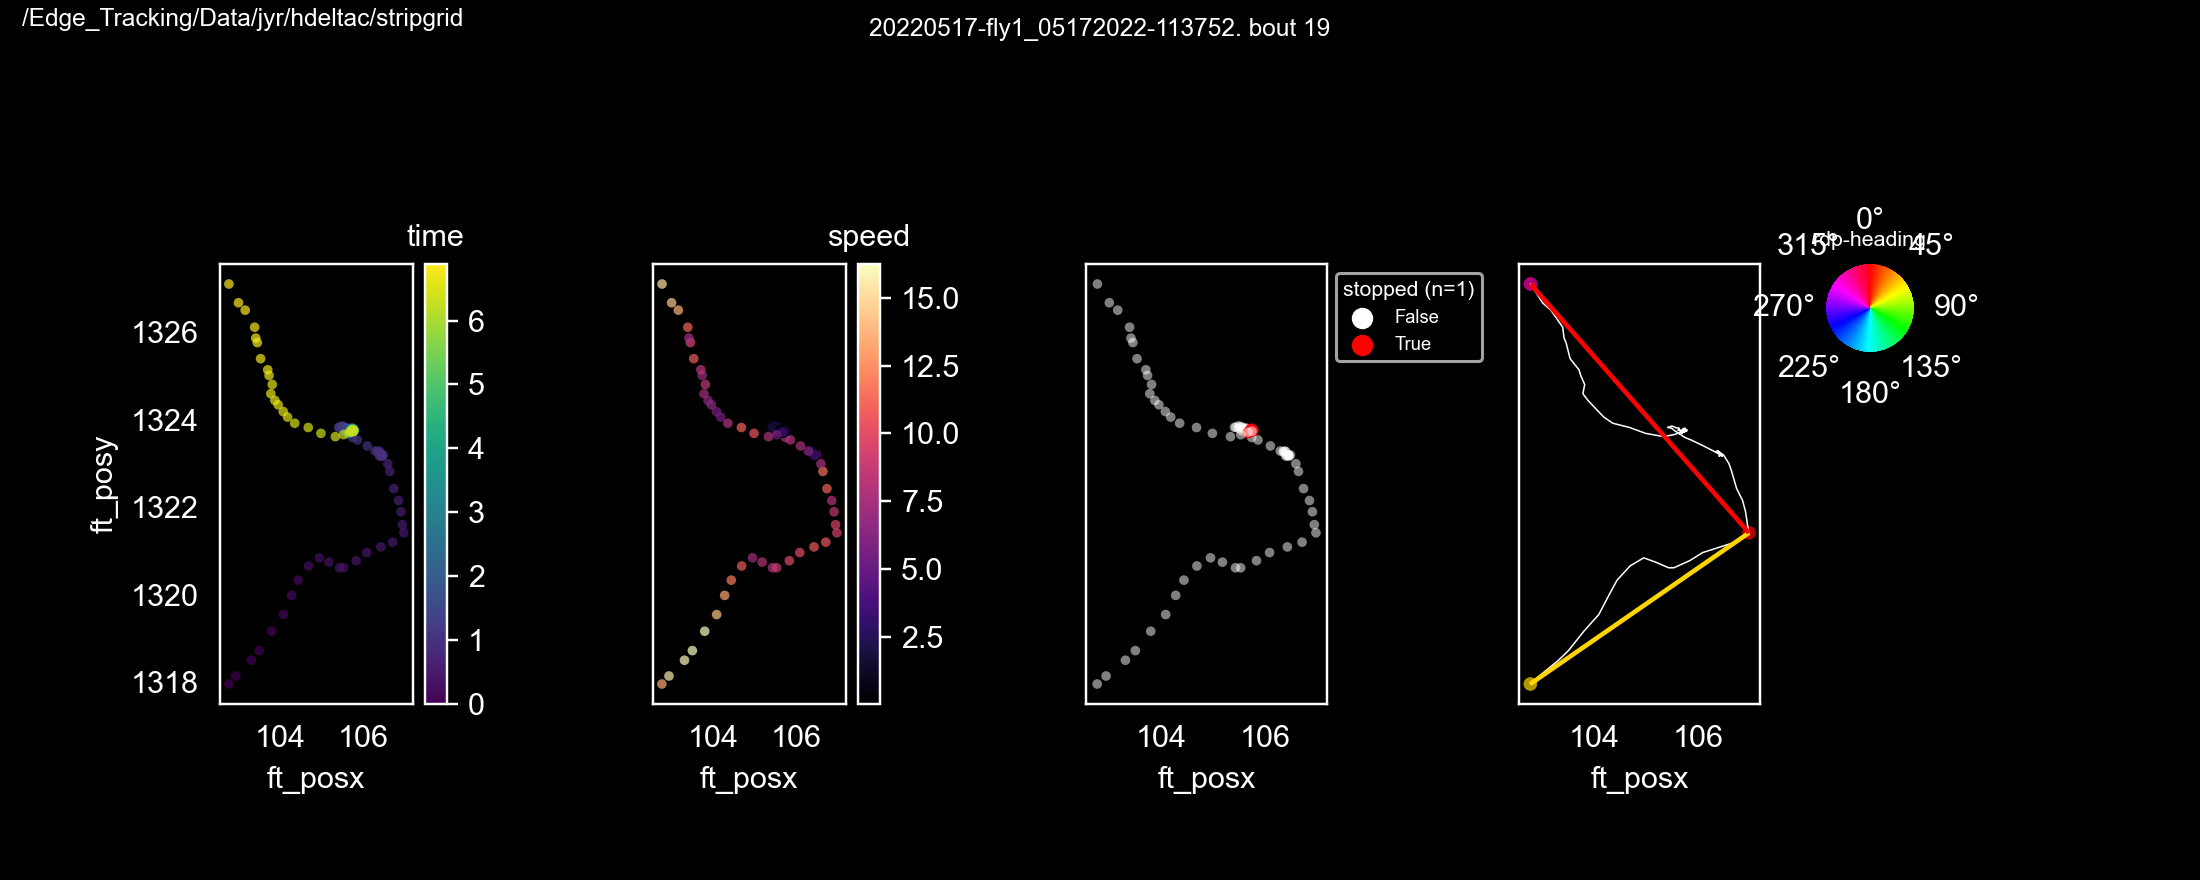

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout19


<IPython.core.display.Javascript object>


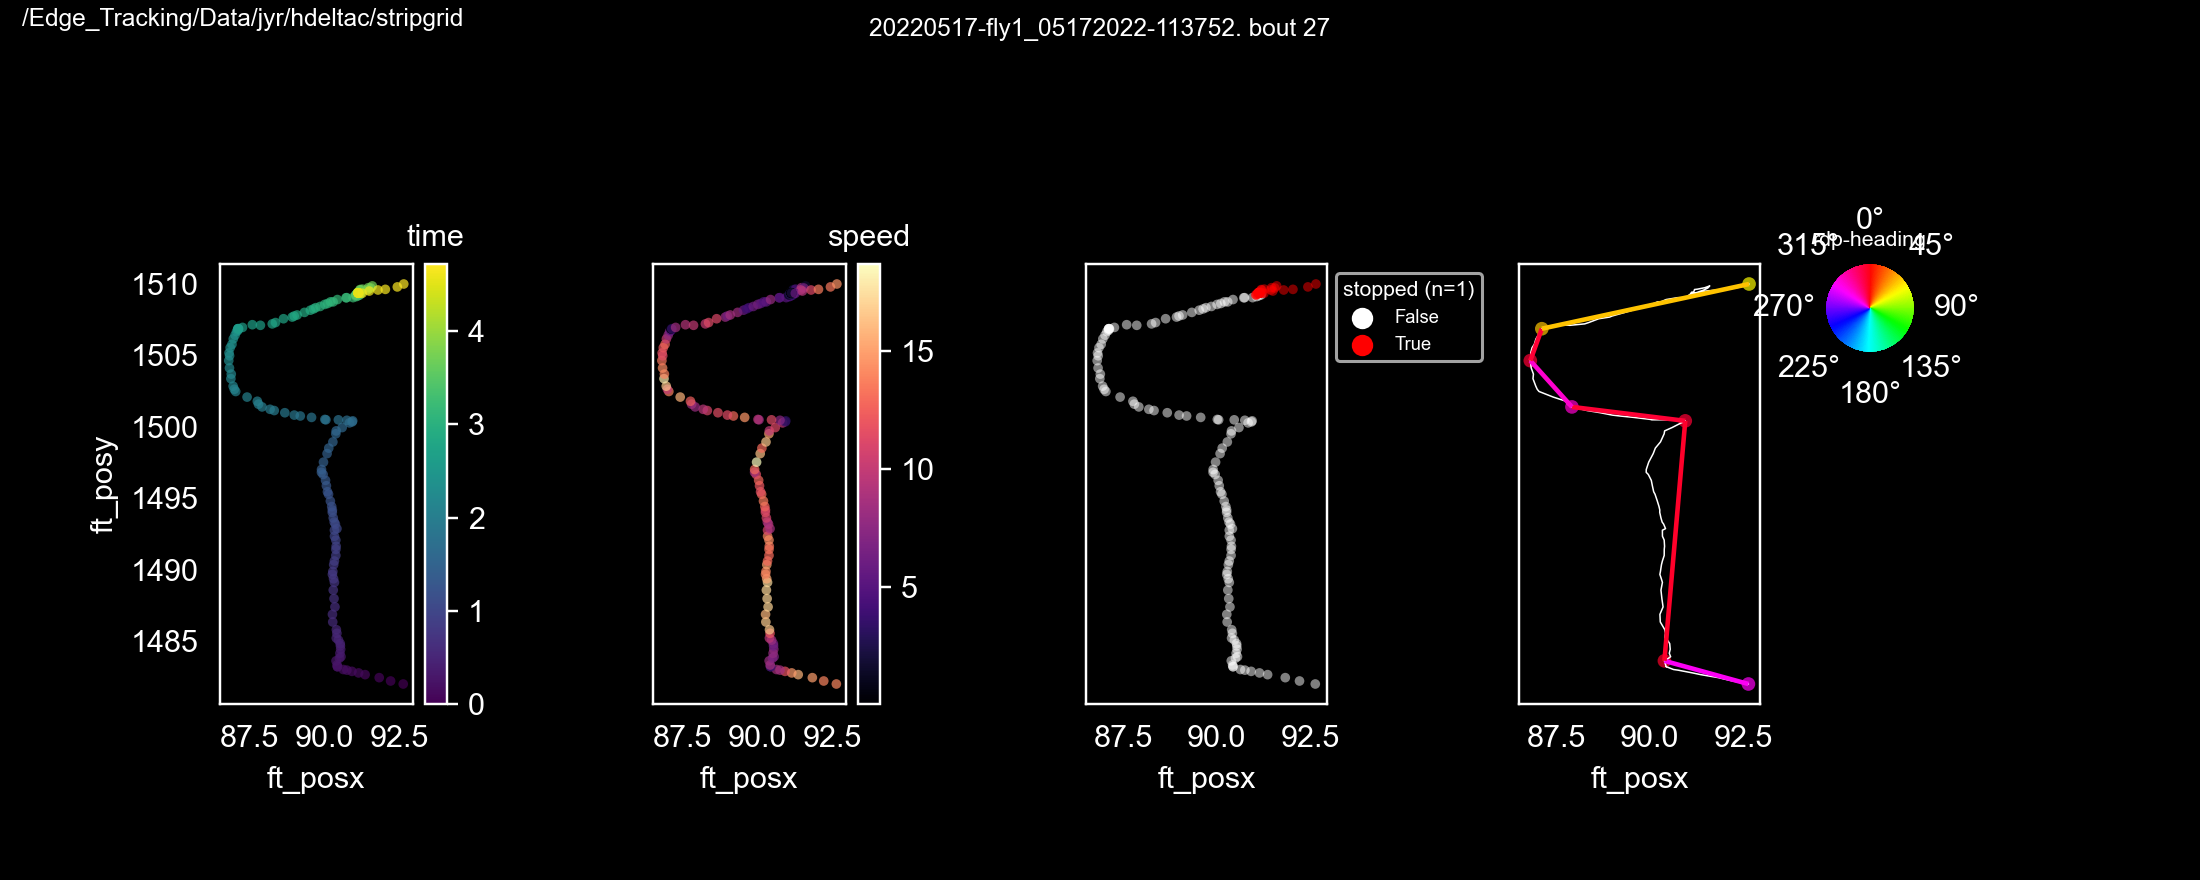

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout27


/Users/julianarhee/Repositories/plume-tracking/behavior.py:1358: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axn = pl.subplots(1, 4, figsize=(10, 4), sharex=True, sharey=True)


<IPython.core.display.Javascript object>


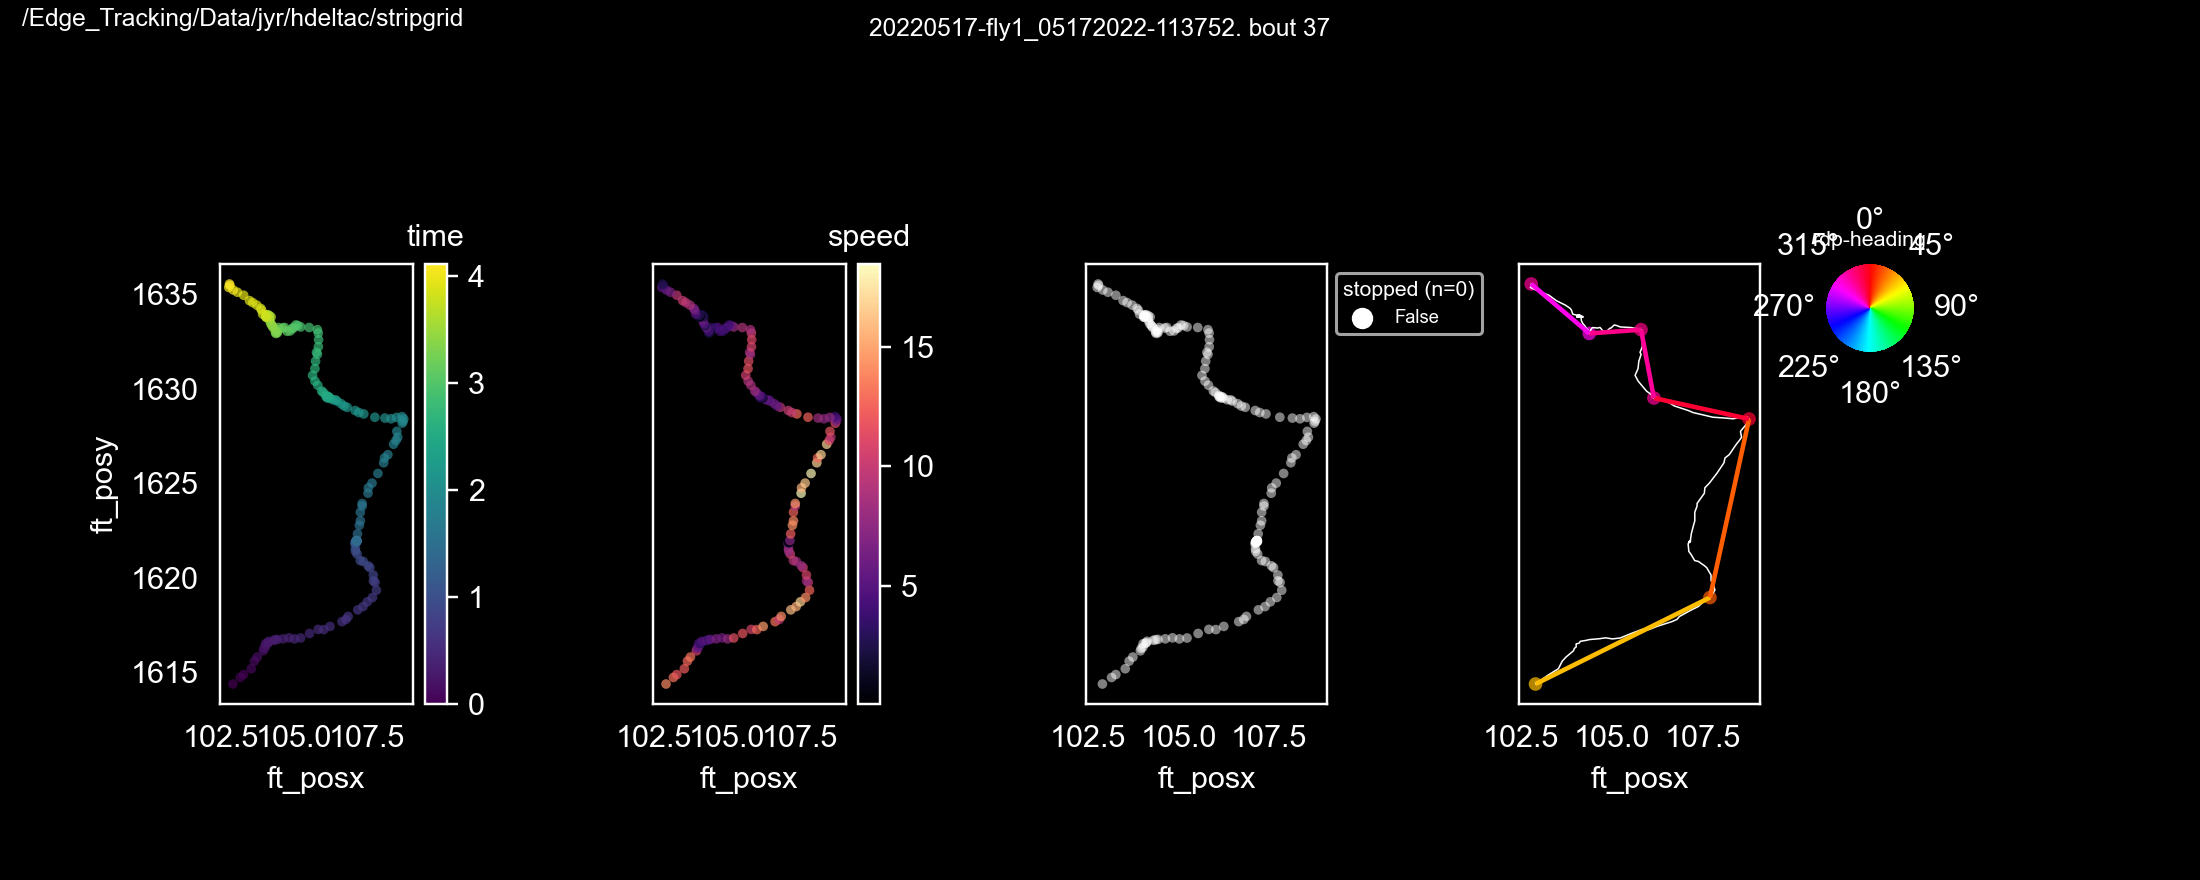

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/flipped heading-at-stops_20220517-fly1_05172022-113752_bout37


In [236]:
stopdur_thresh = 0.5
speed_thresh = 1.0
for bnum in plot_bouts:
    b_ = df_[df_['boutnum']==bnum].copy()
    b_ = butil.calculate_speed(b_, xvar=xvar, yvar=yvar)
    b_ = butil.calculate_stops(b_, stop_thresh=speed_thresh, speed_varname='speed')
    b_ = butil.parse_bouts(b_, count_varname='stopped', bout_varname='stopboutnum')
# b_[b_['stopped']]['stopboutnum'].unique()
    b_ = butil.filter_bouts_by_dur(b_, bout_thresh=stopdur_thresh, \
                               count_varname='stopped', bout_varname='stopboutnum')
    fig = butil.examine_heading_at_stops(b_, xvar=xvar, yvar=yvar, theta_range=theta_range)
    fig.suptitle('{}. bout {}'.format(trial_id, bnum), fontsize=8)
    util.label_figure(fig, fig_id)

    figname = 'heading-at-stops_{}_bout{}'.format(trial_id, bnum)
    pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
    print(curr_savedir, figname)

In [237]:
df_ = butil.get_speed_and_stops(df_, speed_thresh=1.0, stopdur_thresh=0.5)

/Users/julianarhee/Repositories/plume-tracking/behavior.py:1358: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axn = pl.subplots(1, 4, figsize=(10, 4), sharex=True, sharey=True)


<IPython.core.display.Javascript object>


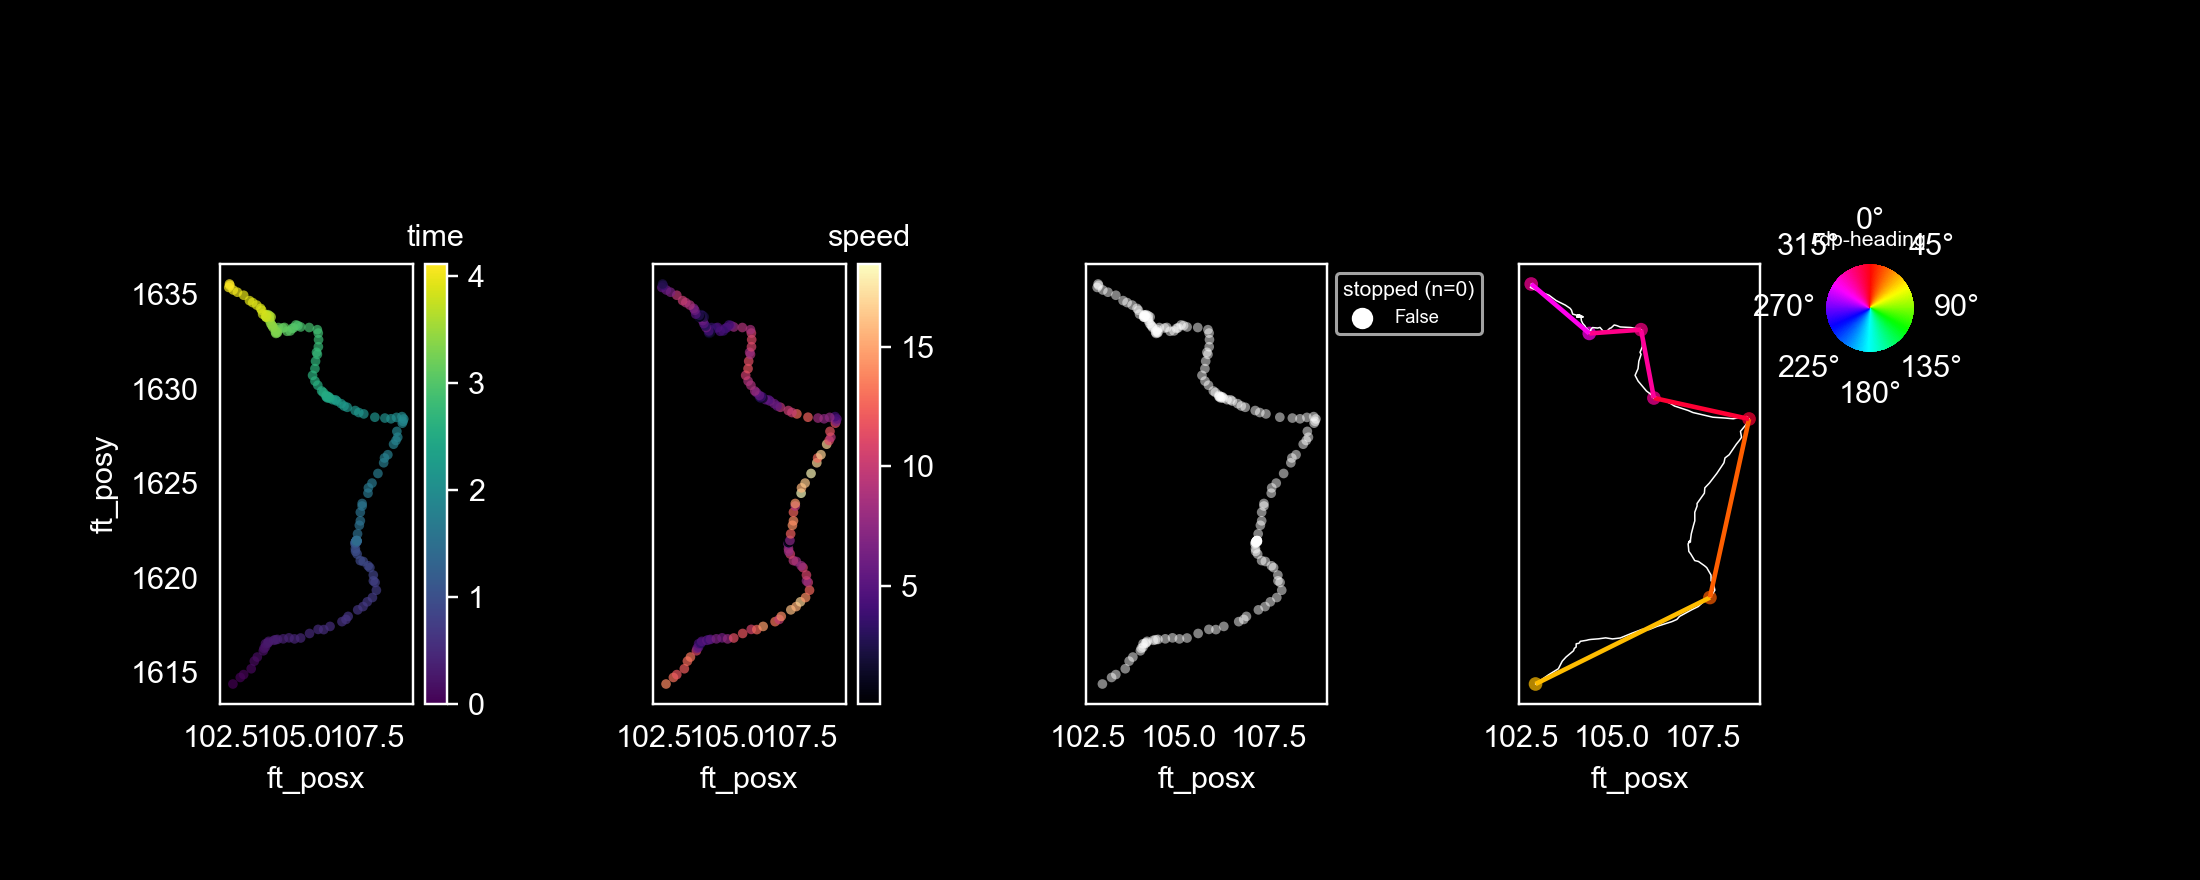

In [238]:
fig = butil.examine_heading_at_stops(b_, xvar=xvar, yvar=yvar)

# distn of angles

In [253]:
meandirs = butil.mean_dir_after_stop(df_, speed_thresh=1.0, stopdur_thresh=0.5)

<IPython.core.display.Javascript object>


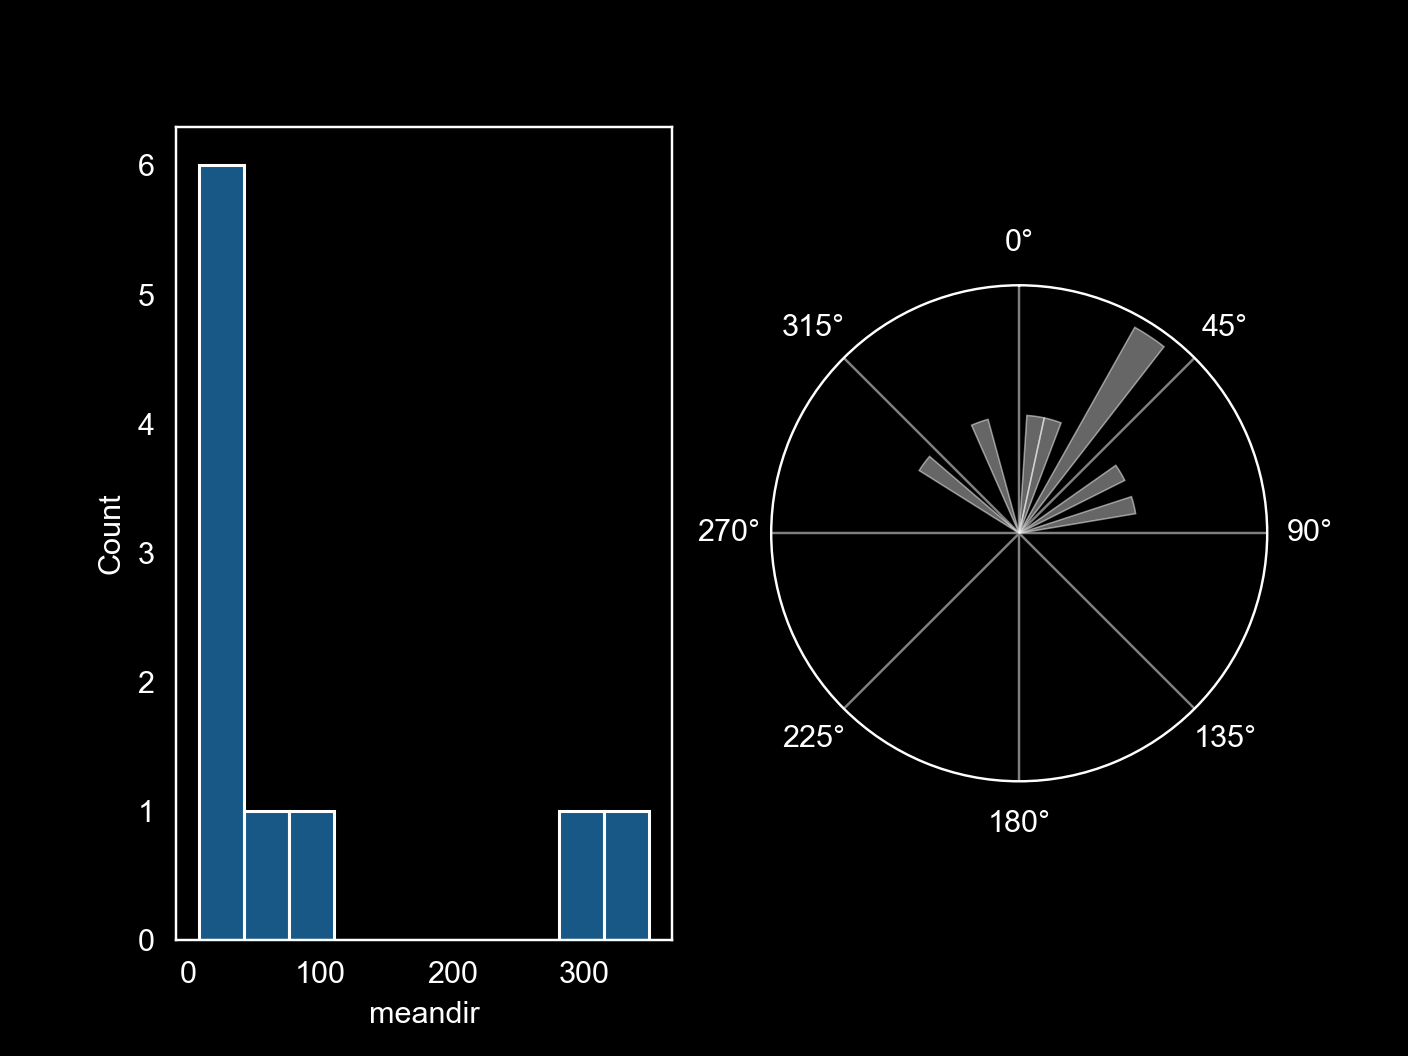

(array([1, 1, 0, 4, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]),
 array([0.13935931, 0.28814995, 0.4369406 , 0.58573124, 0.73452188,
        0.88331253, 1.03210317, 1.18089382, 1.32968446, 1.4784751 ,
        1.62726575, 1.77605639, 1.92484703, 2.07363768, 2.22242832,
        2.37121897, 2.52000961, 2.66880025, 2.8175909 , 2.96638154,
        3.11517218, 3.26396283, 3.41275347, 3.56154412, 3.71033476,
        3.8591254 , 4.00791605, 4.15670669, 4.30549734, 4.45428798,
        4.60307862, 4.75186927, 4.90065991, 5.04945055, 5.1982412 ,
        5.34703184, 5.49582249, 5.64461313, 5.79340377, 5.94219442,
        6.09098506]),
 <BarContainer object of 40 artists>)

In [254]:
#fig, ax = pl.subplots(subplot_kw={'projection': 'polar'})
fig = pl.figure()
ax = fig.add_subplot(121) #pl.subplots()
sns.histplot(data=meandirs, x='meandir', ax=ax, bins=10)
ax=fig.add_subplot(122, projection='polar')
util.circular_hist(ax, np.deg2rad(meandirs['meandir']), bins=40, 
                  facecolor=[0.8]*3)

# all flies

In [242]:
theta_range

(0, 6.283185307179586)

In [241]:
smooth = False
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
speed_thresh=1.0
stopdur_thresh=0.5
heading_var ='ft_heading'
theta_range = (0, 2*np.pi) if heading_var=='ft_heading' else (-np.pi, np.pi)
# ----------------------------------------------------
d_list=[]
m_list=[]
for trial_id, df1 in df_fp.groupby('trial_id'):
    trial_id = df1['trial_id'].unique()[0]
    oparams = butil.get_odor_params(df1) #[df1['condition']==cond])
    df = df1[df1['time']>=oparams['odor_start_time']].copy()
    # process df
    df = butil.smooth_traces(df, window_size=smooth_window, return_same=True)
    df = butil.add_rdp_by_bout(df, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
    # get mean dur after stops
    df = butil.get_speed_and_stops(df, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
    meandirs = butil.mean_dir_after_stop(df, speed_thresh=1.0, stopdur_thresh=0.5, 
                                         theta_range=theta_range, heading_var=heading_var)
    m_list.append(meandirs)
    d_list.append(df)
mdf = pd.concat(m_list).reset_index(drop=True)
df_proc = pd.concat(d_list).reset_index(drop=True)

/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  upwind_before_entry = [b for b, b_ in outbouts_after_entry.groupby(['boutnum']) \
/Users/julianarhee/Repositories/plume-tracking/behavior.py:392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avo

In [243]:
d_list = []
for (trial_id, bnum), df_ in mdf.groupby(['trial_id', 'boutnum']):
    #last_stop = df_['stopboutnum'].max()
    last_ = df_.sort_values(by=['stopboutnum'],ascending=False ).iloc[-5:]
#     meandir = df_.iloc[last_ix]['meandir']
#     xwind_speed = df_.iloc[last_ix]['meandir']
    d_list.append(last_) #df_.iloc[last_ix])
last_stops = pd.concat(d_list, axis=0)
for v in ['crosswind_dist', 'meandir']:
    last_stops[v] = last_stops[v].astype(float)
last_stops

fly_id                       trial_id  \
0    20220517-fly1  20220517-fly1_05172022-113752   
1    20220517-fly1  20220517-fly1_05172022-113752   
3    20220517-fly1  20220517-fly1_05172022-113752   
2    20220517-fly1  20220517-fly1_05172022-113752   
6    20220517-fly1  20220517-fly1_05172022-113752   
..             ...                            ...   
216  20220629-fly3  20220629-fly3_06292022-164712   
215  20220629-fly3  20220629-fly3_06292022-164712   
214  20220629-fly3  20220629-fly3_06292022-164712   
213  20220629-fly3  20220629-fly3_06292022-164712   
212  20220629-fly3  20220629-fly3_06292022-164712   

                                 condition  boutnum  crosswind_dist  \
0    hdc_split_60d05_sytjgcamp7f_stripgrid        3       15.170034   
1    hdc_split_60d05_sytjgcamp7f_stripgrid        7       20.543125   
3    hdc_split_60d05_sytjgcamp7f_stripgrid        9       24.308395   
2    hdc_split_60d05_sytjgcamp7f_stripgrid        9       24.308395   
6    hdc_split_60d05_sytjgcamp7f_stripgrid       15      102.420654   
..                                     ...      ...             ...   
216  hdc_split_60d05_sytjgcamp7f_stripgrid       17      832.007519   
215  hdc_split_60d05_sytjgcamp7f_stripgrid       17      832.007519   
214  hdc_split_60d05_sytjgcamp7f_stripgrid       17      832.007519   
213  hdc_split_60d05_sytjgcamp7f_stripgrid       17      832.007519   
212  hdc_split_60d05_sytjgcamp7f_stripgrid       17      832.007519   

     stopboutnum     meandir  
0              2   36.624156  
1              4    7.984700  
3              8   41.056124  
2              6   16.855352  
6             14   62.938611  
..           ...         ...  
216           16  190.647593  
215           14   49.322423  
214           12    3.109141  
213           10  309.102587  
212            8  265.207707  

[155 rows x 7 columns]

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_14890/161694020.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axn = pl.subplots(1, 2, subplot_kw=dict(projection='polar'))


<IPython.core.display.Javascript object>


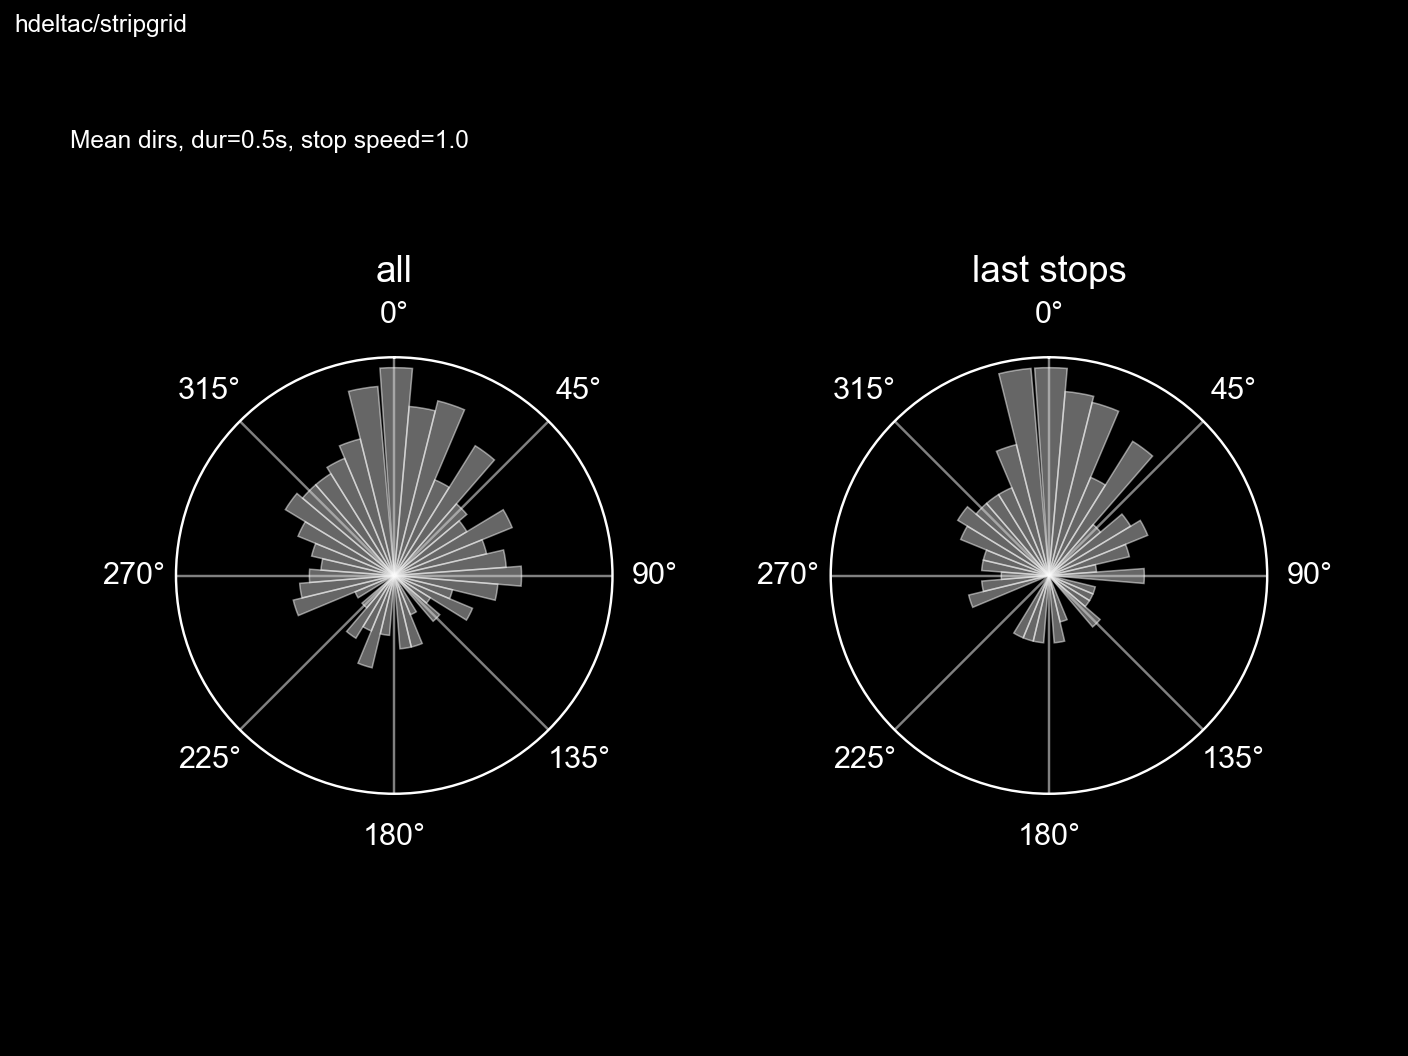

In [244]:
# Construct figure and axis to plot on
fig, axn = pl.subplots(1, 2, subplot_kw=dict(projection='polar'))
# Visualise by area of bins
ax =axn[0]
util.circular_hist(ax, np.deg2rad(mdf['meandir']), bins=40, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('all')
#fig.suptitle('{}. bout {}'.format(fly_id, bnum), fontsize=8)

ax =axn[1]
util.circular_hist(ax, np.deg2rad(last_stops['meandir']), bins=40, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('last stops')
# -------
title = 'Mean dirs, dur={:.1f}s, stop speed={:.1f}'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.05, 0.86, title, fontsize=8)
util.label_figure(fig, '{}'.format(experiment))

figname = 'meandir_after_stop_outbouts_all-flies_polar'
#pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))
#print(save_dir, figname)

In [245]:
mdf['fly_id'].unique()

array(['20220517-fly1', '20220627-fly1', '20220627-fly2', '20220628-fly1',
       '20220629-fly1', '20220629-fly3'], dtype=object)

In [247]:
theta_range

(0, 6.283185307179586)

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_14890/2485997712.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = pl.figure()


<IPython.core.display.Javascript object>


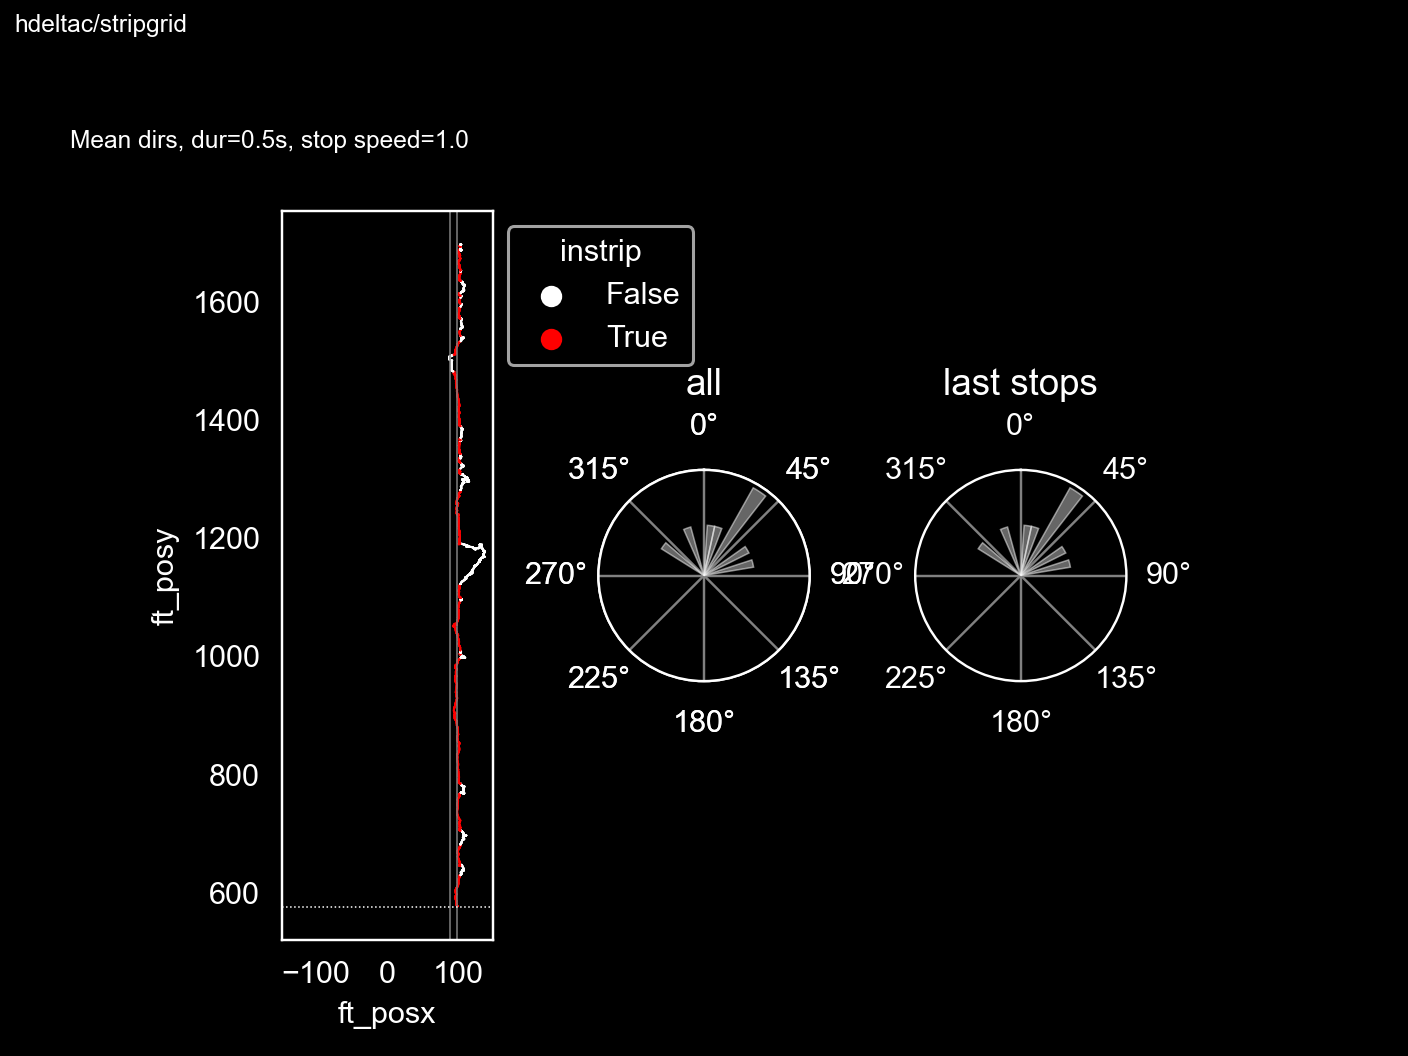

In [246]:
fly_id = '20220517-fly1'
plotdf1 = mdf[mdf['fly_id']==fly_id]
plotdf2 = last_stops[last_stops['fly_id']==fly_id]
df_= df_proc[df_proc['fly_id']==fly_id]
trial_id = df_['trial_id'].unique()[0]
curr_borders = list(odor_borders_fp[trial_id].values())
# Construct figure and axis to plot on
fig = pl.figure()
ax = fig.add_subplot(1, 3, 1)
ax= butil.plot_trajectory(df_, ax=ax, odor_bounds=curr_borders)

#, axn = pl.subplots(1, 2, subplot_kw=dict(projection='polar'))
# Visualise by area of bins
ax = fig.add_subplot(1, 3, 2, projection='polar')
util.circular_hist(ax, np.deg2rad(plotdf1['meandir']), bins=40, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('all')
#fig.suptitle('{}. bout {}'.format(fly_id, bnum), fontsize=8)

ax = fig.add_subplot(1,3,3, projection='polar')
util.circular_hist(ax, np.deg2rad(plotdf2['meandir']), bins=40, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('last stops')
# -------
title = 'Mean dirs, dur={:.1f}s, stop speed={:.1f}'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.05, 0.86, title, fontsize=8)
util.label_figure(fig, '{}'.format(experiment))

figname = 'meandir_after_stop_outbouts_all-flies_polar'
#pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))
#print(save_dir, figname)

<IPython.core.display.Javascript object>


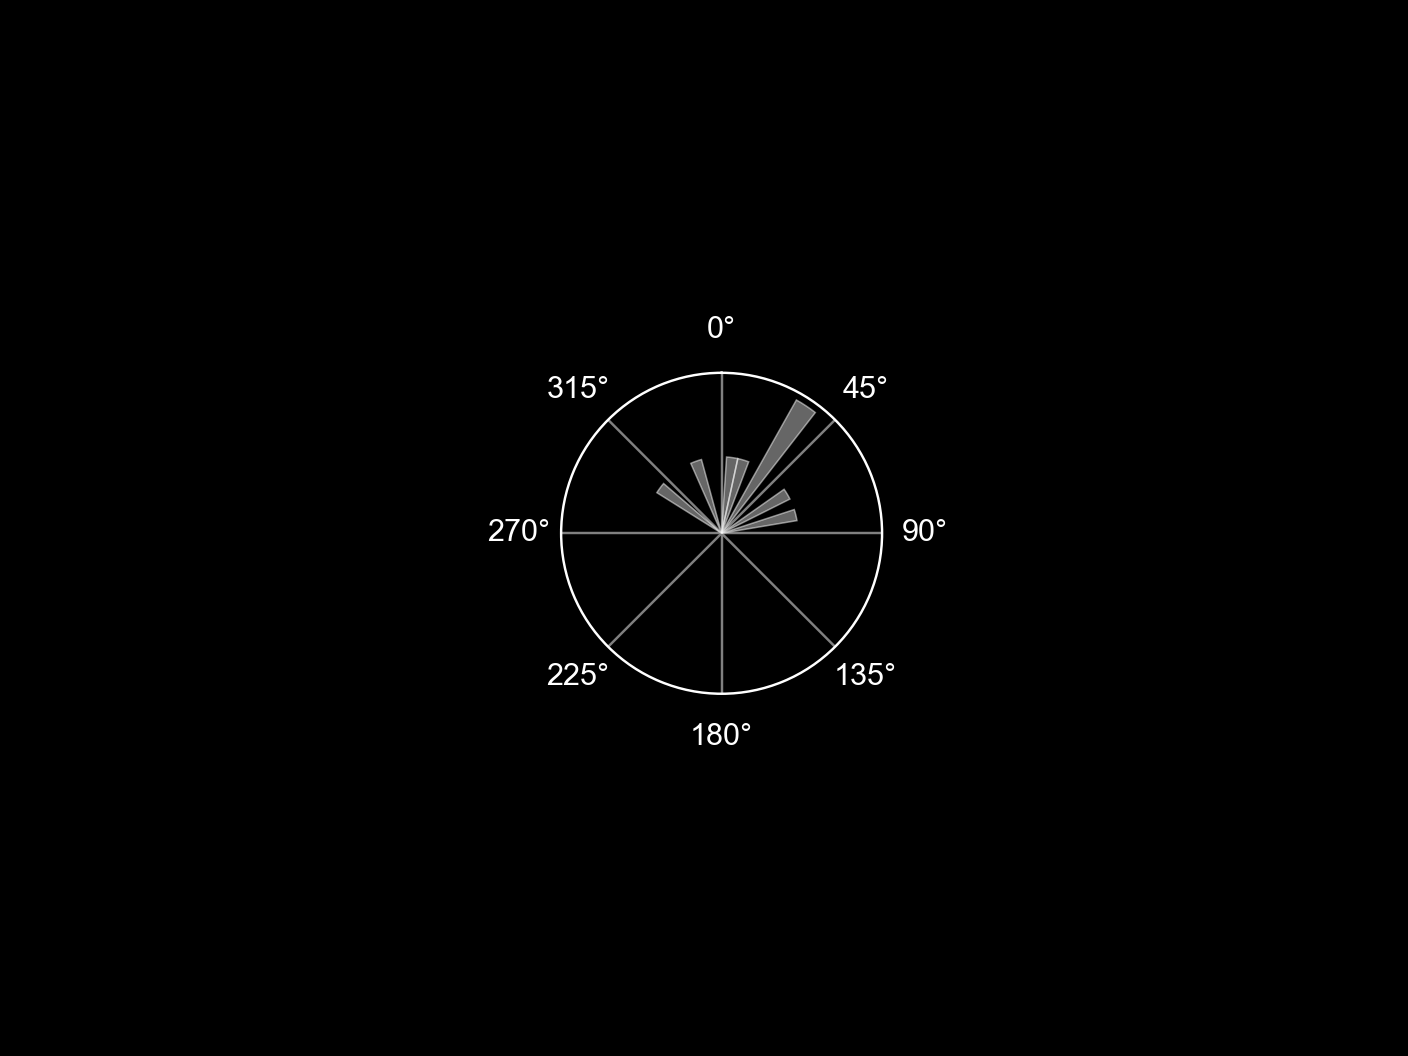

(0.0, 6.283185307179586)

In [251]:
fig = pl.figure()
ax = fig.add_subplot(1, 3, 2, projection='polar')
util.circular_hist(ax, np.deg2rad(plotdf1['meandir']), bins=40, 
                  facecolor=[0.8]*3)
ax.set_xlim(theta_range)

<IPython.core.display.Javascript object>


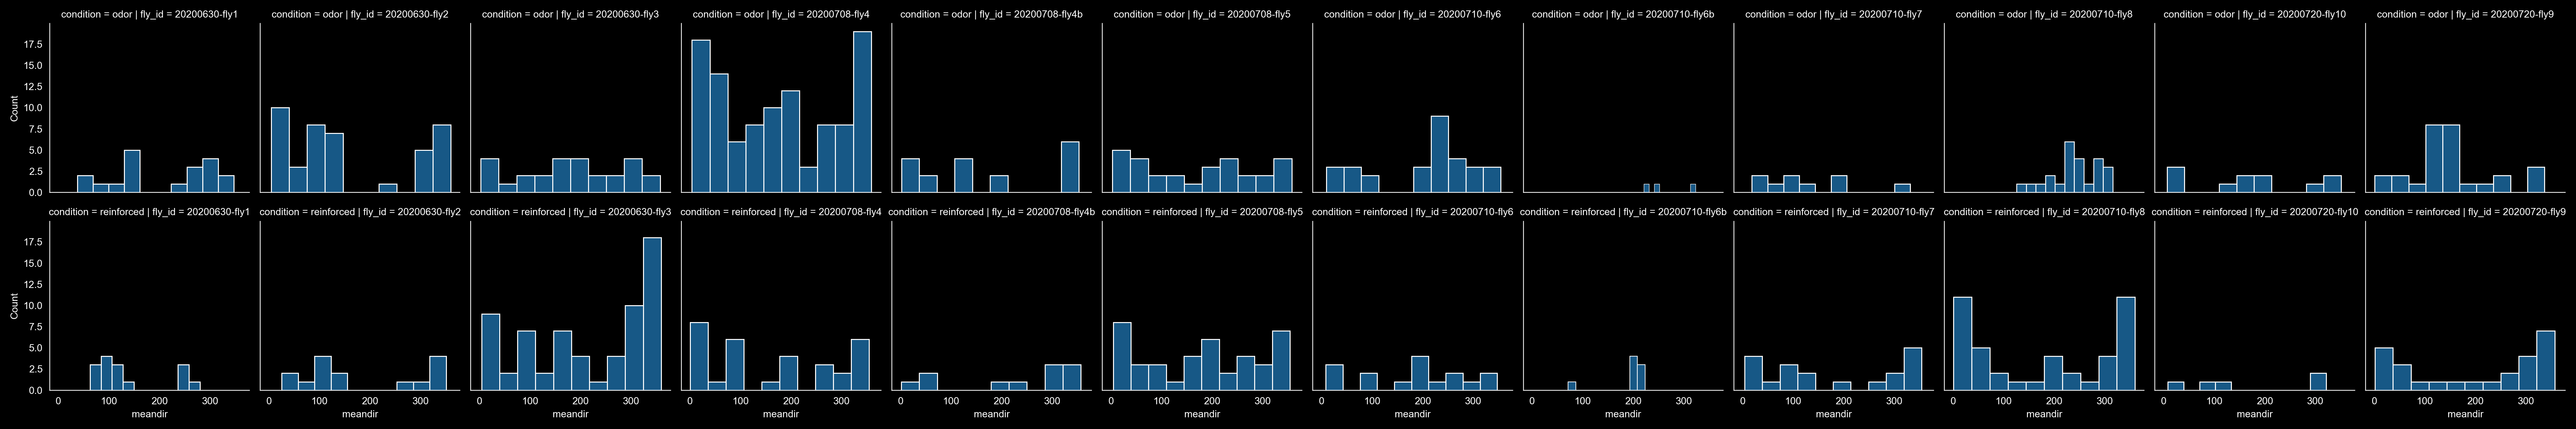

In [529]:
g = sns.FacetGrid(data=mdf[mdf['condition'].isin(['odor', 'reinforced'])], col='fly_id', 
                  row='condition') #col_wrap=3)
g.map_dataframe(sns.histplot, x='meandir', bins=10)
# sns.histplot(data=meandirs, x='meandir', ax=ax, bins=10)

<IPython.core.display.Javascript object>


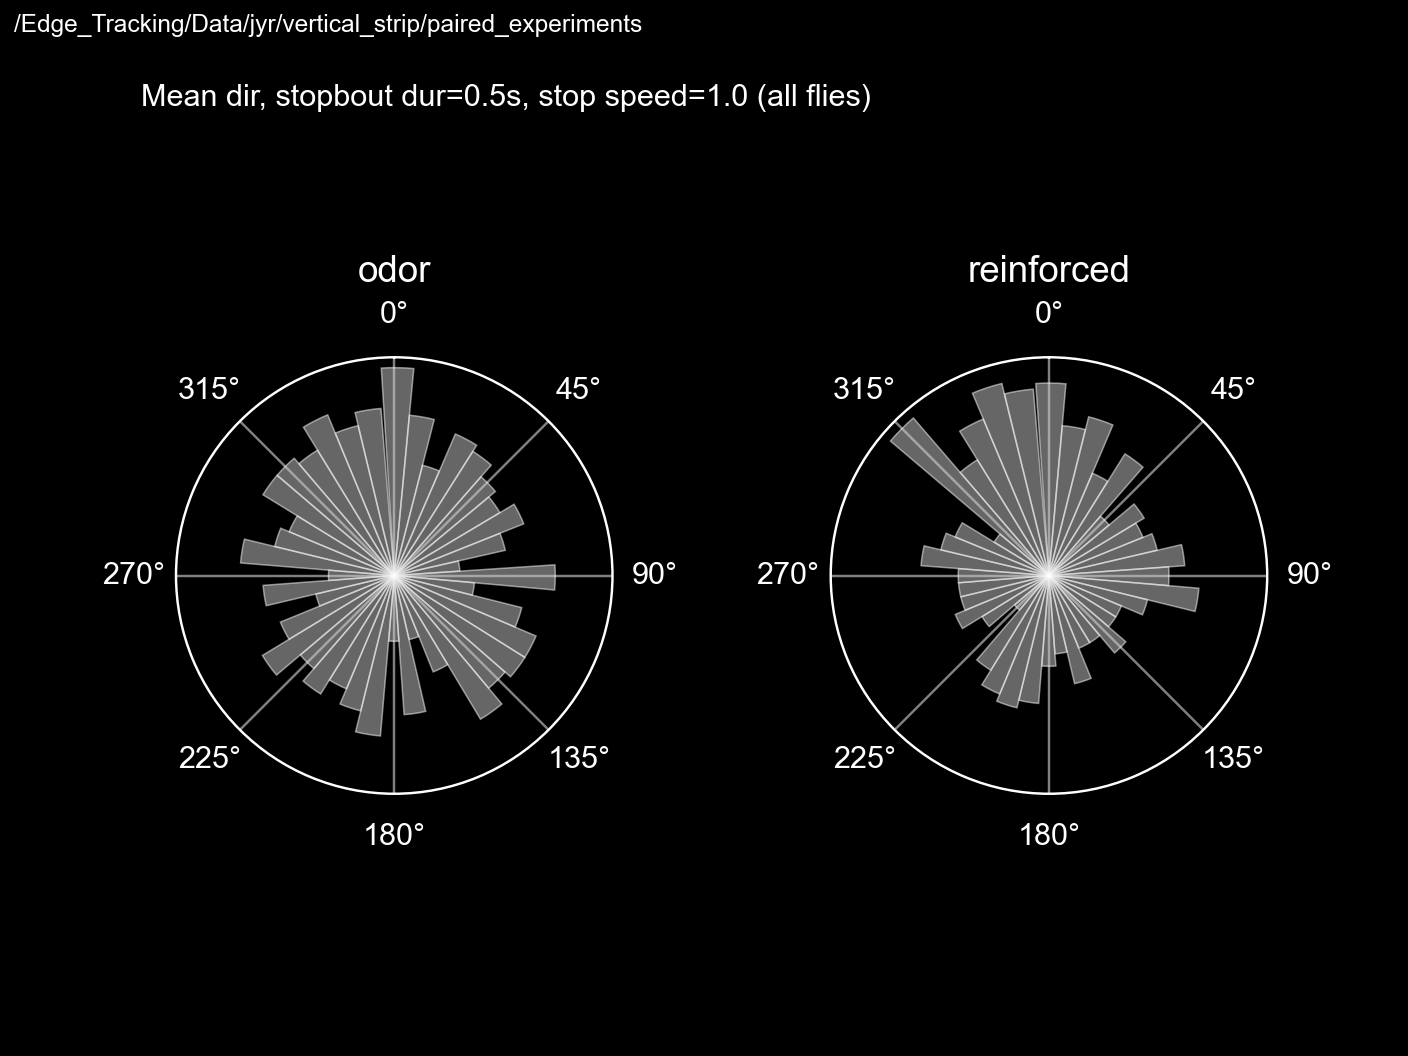

In [573]:
# Construct figure and axis to plot on
fig, axn = pl.subplots(1, 2, subplot_kw=dict(projection='polar'))

# Visualise by area of bins
#ax=axn[0]
for ax, cond in zip(axn, ['odor', 'reinforced']):
    util.circular_hist(ax, np.deg2rad(mdf[mdf['condition']==cond]['meandir']), bins=40, 
                  facecolor=[0.8]*3)
    ax.set_title(cond)
pl.subplots_adjust(wspace=0.5, top=0.8)

title = 'Mean dir, stopbout dur={:.1f}s, stop speed={:.1f} (all flies)'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.1, 0.9, title)

util.label_figure(fig, fig_id)

figname = 'meandir_after_stop_outbouts_all-flies_polar'
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))

<IPython.core.display.Javascript object>


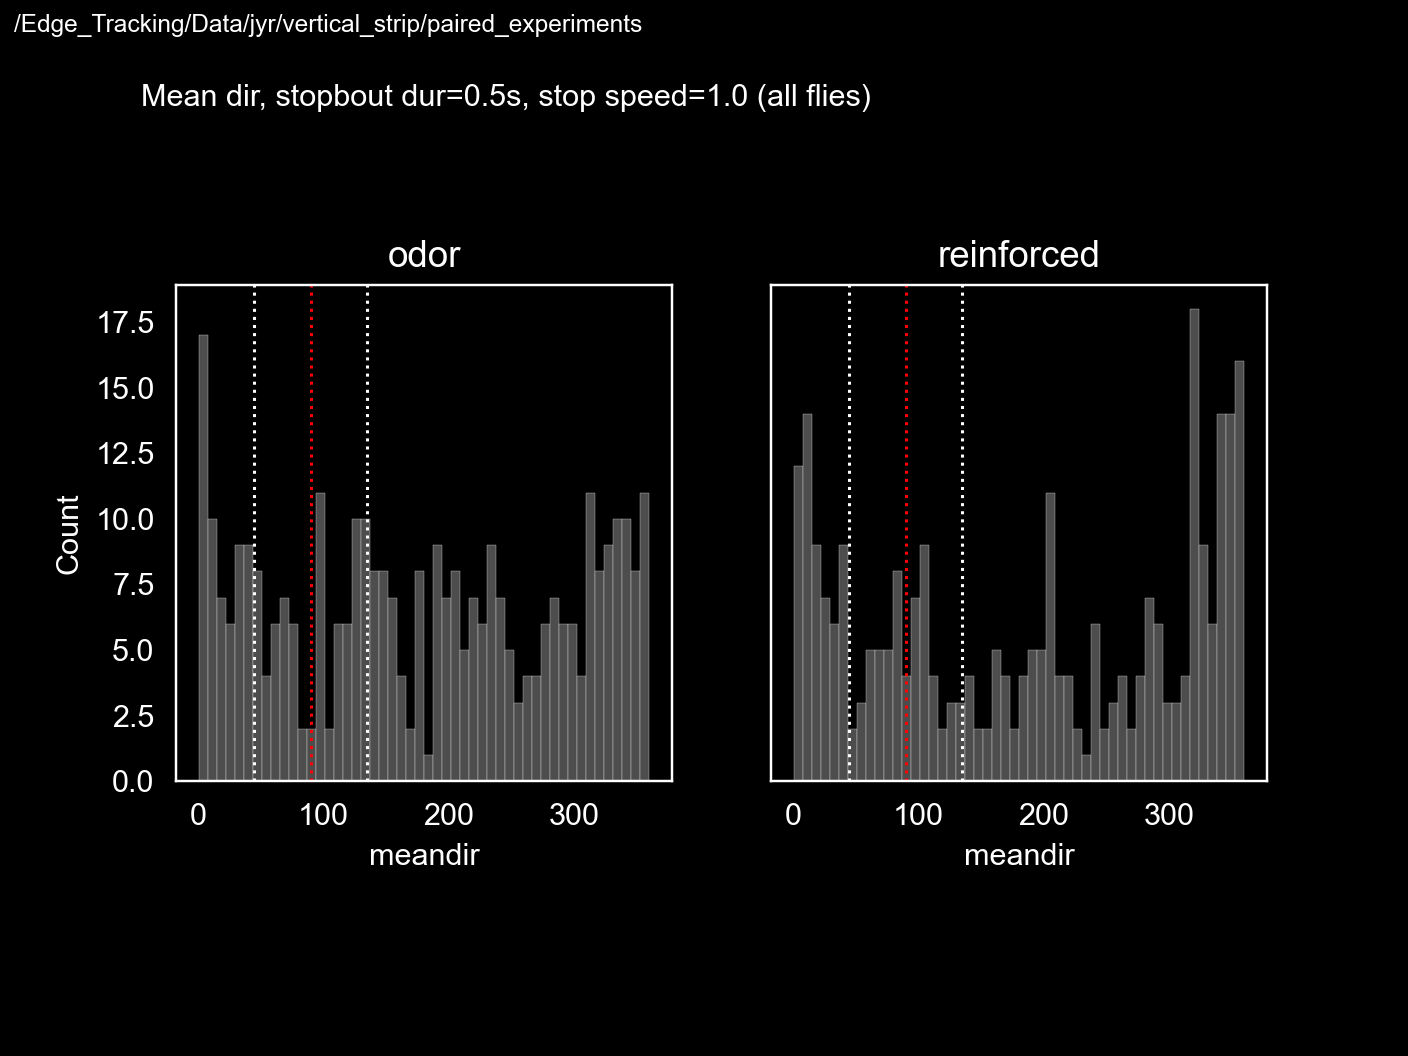

In [574]:
# Construct figure and axis to plot on
fig, axn = pl.subplots(1, 2, sharex=True, sharey=True) #subplot_kw=dict(projection='polar'))
# Visualise by area of bins
#ax=axn[0]
for ax, cond in zip(axn, ['odor', 'reinforced']):
    sns.histplot(data=mdf[mdf['condition'].isin([cond])], x='meandir', bins=50, ax=ax,
                 edgecolor='w', linewidth=0.1, facecolor=[0.3]*3, alpha=0.5)
    ax.set_title(cond)
    ax.axvline(x=45, color='w', lw=1, linestyle=':')
    ax.axvline(x=135, color='w', lw=1, linestyle=':')
    ax.axvline(x=90, color='r', lw=1, linestyle=':')
    ax.set_box_aspect(1)
    

title = 'Mean dir, stopbout dur={:.1f}s, stop speed={:.1f} (all flies)'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.1, 0.9, title)

util.label_figure(fig, fig_id)
figname = 'meandir_after_stop_outbouts_all-flies'
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))